In [1]:
import tensorflow as tf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Using ReLU and reconstruction with 3 hidden layers
### Tensorboard test

epoch 0, learning rate 0.0001
Reconstruction of a 7


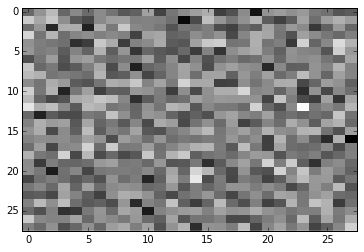

step 0, train accuracy 0.04
step 100, train accuracy 0.1
step 200, train accuracy 0.48
step 300, train accuracy 0.5
step 400, train accuracy 0.78
step 500, train accuracy 0.76
step 600, train accuracy 0.82
step 700, train accuracy 0.86
step 800, train accuracy 0.72
step 900, train accuracy 0.8
Reconstruction of a 1


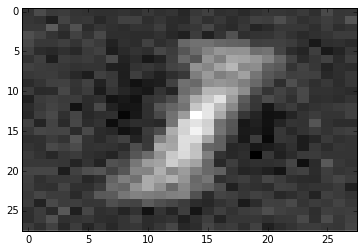

step 1000, train accuracy 0.92


KeyboardInterrupt: 

In [3]:
# with tf.Graph().as_default(): 
with tf.name_scope('common'):
  x = tf.placeholder(tf.float32, shape=[None, 784])
  y_ = tf.placeholder(tf.float32, shape=[None, 10])
  # x_r = tf.placeholder(tf.float32, shape=[None, 784])
  learning_rate = tf.placeholder(tf.float32, shape=[])

  W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
  b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
  W_2 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
  b_2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
  W_3 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
  b_3 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
  W_4 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
  b_4 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

  a = tf.nn.relu(tf.matmul(x, W) + b)
  a_2 = tf.nn.relu(tf.matmul(a, W_2) + b_2)
  a_3 = tf.nn.relu(tf.matmul(a_2, W_3) + b_3)
  y = tf.nn.sigmoid(tf.matmul(a_3, W_4) + b_4)

with tf.name_scope('backwards'):
  a_2_r = tf.nn.relu(tf.matmul(a_3 - b_3, tf.transpose(W_3)))
  a_r = tf.nn.relu(tf.matmul(a_2_r - b_2, tf.transpose(W_2)))
  x_r = tf.matmul(a_r - b, tf.transpose(W))

global_step = tf.Variable(0, name='global_step', trainable=False)

# losses
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), 
                                            reduction_indices=[1]),
                            name='xentropy_mean')
tf.scalar_summary(cross_entropy.op.name, cross_entropy)

reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]),
                                    name='reconstruction_l2_mean_error')
tf.scalar_summary(reconstruction_error.op.name, reconstruction_error)

# training
# train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy, 
                                                          global_step=global_step)
back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)

# evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

########## INIT AND SUMMARY HAVE TO APPEAR HERE AT THE END TO BE PROPERLY DEFINED
# misc
init = tf.initialize_all_variables()
summary_op = tf.merge_all_summaries()

with tf.Session() as sess:
  sess.run(init)
  summary_writer = tf.train.SummaryWriter('./mnist_relu_3hl/recons_adam', sess.graph)

  num_epochs = 10
  steps_per_epoch = 10000
  for epoch in range(num_epochs):
    l_r = 10**np.linspace(-4,-7,num_epochs)[epoch]
    print("epoch %d, learning rate %g"%(epoch,l_r))

    for step in range(steps_per_epoch):
      batch = mnist.train.next_batch(50)
      feed_dict = {x: batch[0], y_: batch[1], learning_rate: l_r}

      if step%1000 == 0:
        reconstruction = x_r.eval(feed_dict=feed_dict)
        print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
        plt.imshow(np.reshape(reconstruction[0],(28,28)),
                   cmap=plt.get_cmap('gray'),
                   interpolation='none',
                   aspect="auto")
        plt.show()

      if step%100 == 0:
        train_accuracy = accuracy.eval(feed_dict=feed_dict)
        print("step %d, train accuracy %g"%(step + epoch*steps_per_epoch, train_accuracy))
        summary_str = sess.run(summary_op, feed_dict=feed_dict)
        summary_writer.add_summary(summary_str, step + epoch*steps_per_epoch)
        summary_writer.flush()

      train_step.run(feed_dict=feed_dict)
      back_train_step.run(feed_dict=feed_dict)

  print("test accuracy %g"%accuracy.eval(feed_dict={
      x: mnist.test.images, y_: mnist.test.labels}))

epoch 0, learning rate 0.0001
Reconstruction of a 8


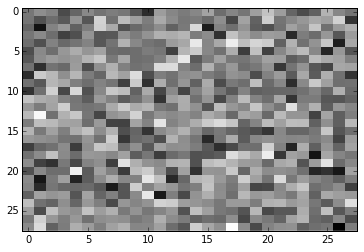

step 0, train accuracy 0.04
step 100, train accuracy 0.14
step 200, train accuracy 0.46
step 300, train accuracy 0.68
step 400, train accuracy 0.72
step 500, train accuracy 0.72
step 600, train accuracy 0.7
step 700, train accuracy 0.8
step 800, train accuracy 0.82
step 900, train accuracy 0.78
Reconstruction of a 2


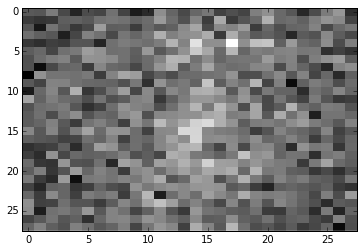

step 1000, train accuracy 0.88
step 1100, train accuracy 1
step 1200, train accuracy 0.92
step 1300, train accuracy 0.92
step 1400, train accuracy 0.92
step 1500, train accuracy 0.9
step 1600, train accuracy 0.92
step 1700, train accuracy 0.96
step 1800, train accuracy 0.92
step 1900, train accuracy 0.94
Reconstruction of a 2


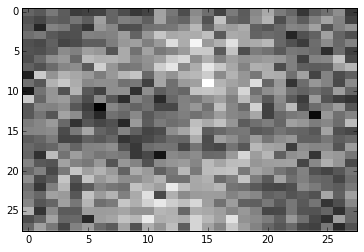

step 2000, train accuracy 0.96
step 2100, train accuracy 0.9
step 2200, train accuracy 0.94
step 2300, train accuracy 0.9
step 2400, train accuracy 0.94
step 2500, train accuracy 0.92
step 2600, train accuracy 0.92
step 2700, train accuracy 0.9
step 2800, train accuracy 0.96
step 2900, train accuracy 0.92
Reconstruction of a 2


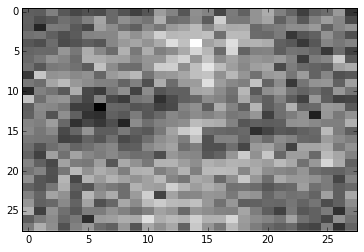

step 3000, train accuracy 0.94
step 3100, train accuracy 0.86
step 3200, train accuracy 1
step 3300, train accuracy 0.94
step 3400, train accuracy 0.92
step 3500, train accuracy 0.88
step 3600, train accuracy 0.9
step 3700, train accuracy 0.94
step 3800, train accuracy 0.86
step 3900, train accuracy 0.96
Reconstruction of a 1


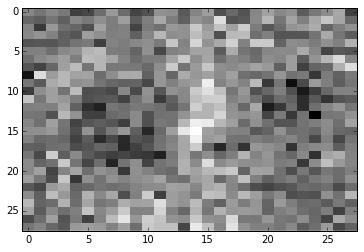

step 4000, train accuracy 0.96
step 4100, train accuracy 0.98
step 4200, train accuracy 0.94
step 4300, train accuracy 0.94
step 4400, train accuracy 0.94
step 4500, train accuracy 0.94
step 4600, train accuracy 0.92
step 4700, train accuracy 0.94
step 4800, train accuracy 0.92
step 4900, train accuracy 0.92
Reconstruction of a 8


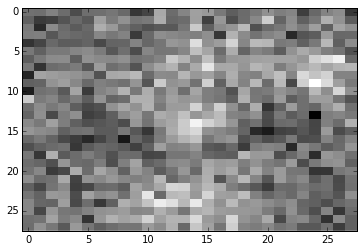

step 5000, train accuracy 1
step 5100, train accuracy 0.94
step 5200, train accuracy 1
step 5300, train accuracy 0.94
step 5400, train accuracy 0.96
step 5500, train accuracy 0.94
step 5600, train accuracy 0.94
step 5700, train accuracy 0.96
step 5800, train accuracy 0.98
step 5900, train accuracy 0.98
Reconstruction of a 5


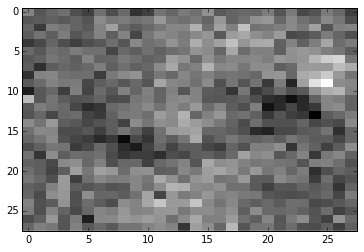

step 6000, train accuracy 0.96
step 6100, train accuracy 0.92
step 6200, train accuracy 0.98
step 6300, train accuracy 0.92
step 6400, train accuracy 0.98
step 6500, train accuracy 0.92
step 6600, train accuracy 0.98
step 6700, train accuracy 0.94
step 6800, train accuracy 0.96
step 6900, train accuracy 0.94
Reconstruction of a 2


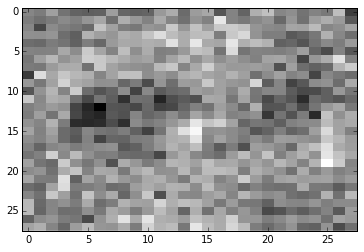

step 7000, train accuracy 1
step 7100, train accuracy 0.94
step 7200, train accuracy 0.88
step 7300, train accuracy 0.98
step 7400, train accuracy 0.96
step 7500, train accuracy 0.96
step 7600, train accuracy 0.98
step 7700, train accuracy 0.94
step 7800, train accuracy 0.96
step 7900, train accuracy 0.94
Reconstruction of a 4


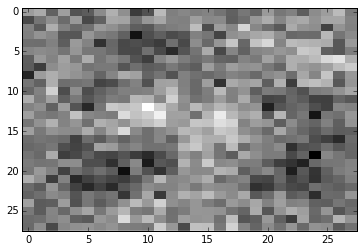

step 8000, train accuracy 0.96
step 8100, train accuracy 0.98
step 8200, train accuracy 0.96
step 8300, train accuracy 0.92
step 8400, train accuracy 0.98
step 8500, train accuracy 0.98
step 8600, train accuracy 0.96
step 8700, train accuracy 0.96
step 8800, train accuracy 0.98
step 8900, train accuracy 0.94
Reconstruction of a 8


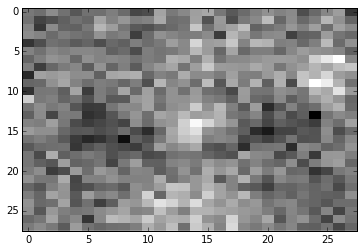

step 9000, train accuracy 0.98
step 9100, train accuracy 0.96
step 9200, train accuracy 0.96
step 9300, train accuracy 1
step 9400, train accuracy 0.98
step 9500, train accuracy 0.96
step 9600, train accuracy 0.96
step 9700, train accuracy 0.98
step 9800, train accuracy 0.96
step 9900, train accuracy 1
epoch 1, learning rate 4.64159e-05
Reconstruction of a 6


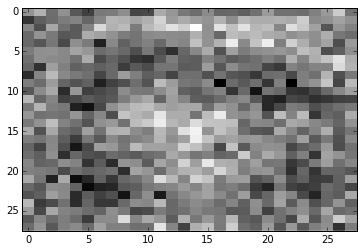

step 10000, train accuracy 0.96
step 10100, train accuracy 1
step 10200, train accuracy 0.94
step 10300, train accuracy 0.96
step 10400, train accuracy 1
step 10500, train accuracy 0.96
step 10600, train accuracy 1
step 10700, train accuracy 1
step 10800, train accuracy 0.96
step 10900, train accuracy 1
Reconstruction of a 2


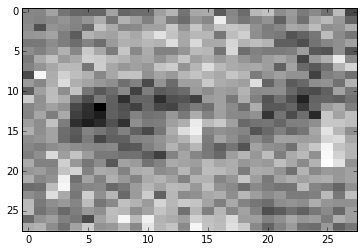

step 11000, train accuracy 0.96
step 11100, train accuracy 1
step 11200, train accuracy 0.96
step 11300, train accuracy 0.98
step 11400, train accuracy 0.96
step 11500, train accuracy 0.98
step 11600, train accuracy 0.98
step 11700, train accuracy 1
step 11800, train accuracy 0.98
step 11900, train accuracy 0.96
Reconstruction of a 7


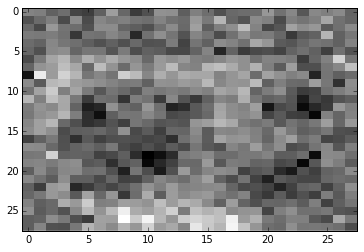

step 12000, train accuracy 1
step 12100, train accuracy 0.98
step 12200, train accuracy 0.98
step 12300, train accuracy 0.98
step 12400, train accuracy 1
step 12500, train accuracy 0.96
step 12600, train accuracy 1
step 12700, train accuracy 1
step 12800, train accuracy 0.96
step 12900, train accuracy 0.98
Reconstruction of a 5


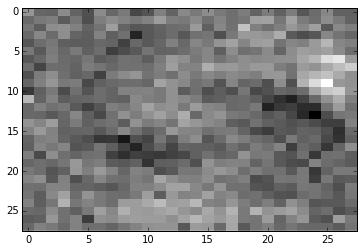

step 13000, train accuracy 0.96
step 13100, train accuracy 0.98
step 13200, train accuracy 0.98
step 13300, train accuracy 1
step 13400, train accuracy 0.94
step 13500, train accuracy 0.96
step 13600, train accuracy 0.92
step 13700, train accuracy 0.98
step 13800, train accuracy 0.98
step 13900, train accuracy 0.98
Reconstruction of a 5


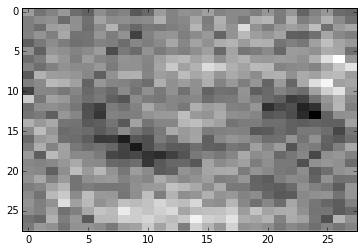

step 14000, train accuracy 0.98
step 14100, train accuracy 0.94
step 14200, train accuracy 0.98
step 14300, train accuracy 0.98
step 14400, train accuracy 0.96
step 14500, train accuracy 0.98
step 14600, train accuracy 1
step 14700, train accuracy 0.96
step 14800, train accuracy 0.98
step 14900, train accuracy 0.92
Reconstruction of a 6


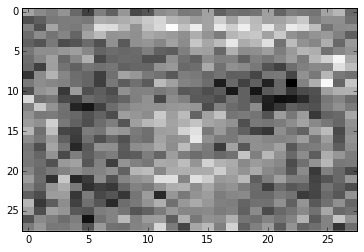

step 15000, train accuracy 0.98
step 15100, train accuracy 0.98
step 15200, train accuracy 0.98
step 15300, train accuracy 0.96
step 15400, train accuracy 0.1
step 15500, train accuracy 0.08
step 15600, train accuracy 0.12
step 15700, train accuracy 0.1
step 15800, train accuracy 0.06
step 15900, train accuracy 0.08
Reconstruction of a 4


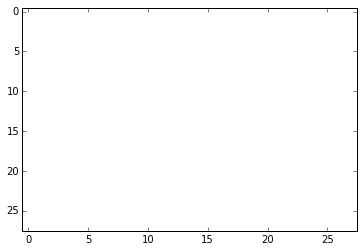

step 16000, train accuracy 0.1
step 16100, train accuracy 0.08
step 16200, train accuracy 0.08
step 16300, train accuracy 0.1
step 16400, train accuracy 0.12
step 16500, train accuracy 0.08
step 16600, train accuracy 0.1
step 16700, train accuracy 0.06
step 16800, train accuracy 0.18
step 16900, train accuracy 0.18
Reconstruction of a 1


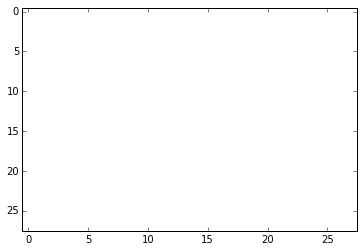

step 17000, train accuracy 0.08
step 17100, train accuracy 0.06
step 17200, train accuracy 0.12
step 17300, train accuracy 0.12
step 17400, train accuracy 0.06
step 17500, train accuracy 0.12
step 17600, train accuracy 0.1
step 17700, train accuracy 0.08
step 17800, train accuracy 0.14
step 17900, train accuracy 0.18
Reconstruction of a 4


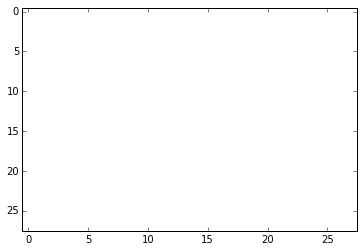

step 18000, train accuracy 0.08
step 18100, train accuracy 0.06
step 18200, train accuracy 0.06
step 18300, train accuracy 0.22
step 18400, train accuracy 0.16
step 18500, train accuracy 0.08
step 18600, train accuracy 0.12
step 18700, train accuracy 0.1
step 18800, train accuracy 0.12
step 18900, train accuracy 0.08
Reconstruction of a 4


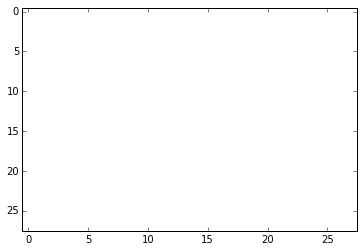

step 19000, train accuracy 0.1
step 19100, train accuracy 0.18
step 19200, train accuracy 0.08
step 19300, train accuracy 0.04
step 19400, train accuracy 0.08
step 19500, train accuracy 0.1
step 19600, train accuracy 0.08
step 19700, train accuracy 0.1
step 19800, train accuracy 0.04
step 19900, train accuracy 0.1
epoch 2, learning rate 2.15443e-05
Reconstruction of a 0


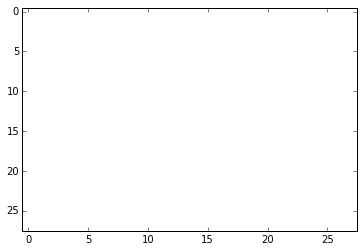

step 20000, train accuracy 0.14
step 20100, train accuracy 0.06
step 20200, train accuracy 0.14
step 20300, train accuracy 0.12
step 20400, train accuracy 0.06
step 20500, train accuracy 0.06
step 20600, train accuracy 0.12
step 20700, train accuracy 0.06
step 20800, train accuracy 0.18
step 20900, train accuracy 0.08
Reconstruction of a 8


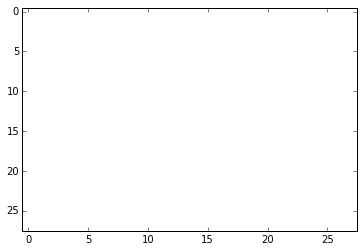

step 21000, train accuracy 0.1
step 21100, train accuracy 0.06
step 21200, train accuracy 0.14
step 21300, train accuracy 0.18
step 21400, train accuracy 0.06
step 21500, train accuracy 0.08
step 21600, train accuracy 0.08
step 21700, train accuracy 0.06
step 21800, train accuracy 0.1
step 21900, train accuracy 0.08
Reconstruction of a 3


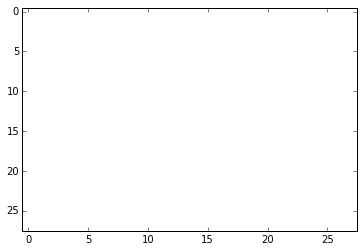

step 22000, train accuracy 0.1
step 22100, train accuracy 0.04
step 22200, train accuracy 0.16
step 22300, train accuracy 0.12
step 22400, train accuracy 0.04
step 22500, train accuracy 0.02
step 22600, train accuracy 0.12
step 22700, train accuracy 0.14
step 22800, train accuracy 0.12
step 22900, train accuracy 0
Reconstruction of a 8


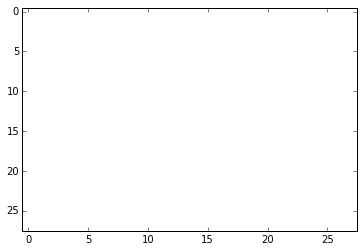

step 23000, train accuracy 0.12
step 23100, train accuracy 0.18
step 23200, train accuracy 0.06
step 23300, train accuracy 0.16
step 23400, train accuracy 0.02
step 23500, train accuracy 0.02
step 23600, train accuracy 0.06
step 23700, train accuracy 0.1
step 23800, train accuracy 0.14
step 23900, train accuracy 0.08
Reconstruction of a 9


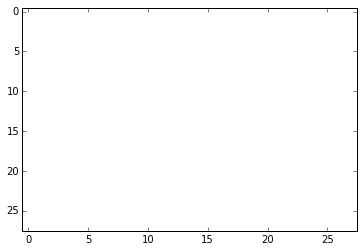

step 24000, train accuracy 0.08
step 24100, train accuracy 0.1
step 24200, train accuracy 0.1
step 24300, train accuracy 0.08
step 24400, train accuracy 0.12
step 24500, train accuracy 0.22
step 24600, train accuracy 0.06
step 24700, train accuracy 0.14
step 24800, train accuracy 0.1
step 24900, train accuracy 0.14
Reconstruction of a 1


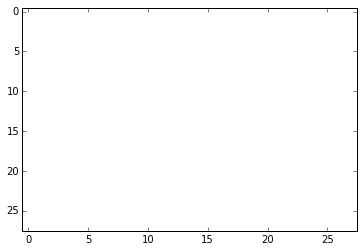

step 25000, train accuracy 0.08
step 25100, train accuracy 0.1
step 25200, train accuracy 0.06
step 25300, train accuracy 0.18
step 25400, train accuracy 0.1
step 25500, train accuracy 0.12
step 25600, train accuracy 0.16
step 25700, train accuracy 0.1
step 25800, train accuracy 0.12
step 25900, train accuracy 0.12
Reconstruction of a 4


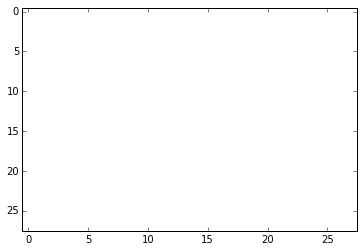

step 26000, train accuracy 0.1
step 26100, train accuracy 0.12
step 26200, train accuracy 0.04
step 26300, train accuracy 0.16
step 26400, train accuracy 0.08
step 26500, train accuracy 0.04
step 26600, train accuracy 0.08
step 26700, train accuracy 0.1
step 26800, train accuracy 0.16
step 26900, train accuracy 0.16
Reconstruction of a 6


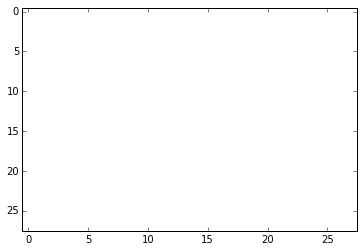

step 27000, train accuracy 0.06
step 27100, train accuracy 0.1
step 27200, train accuracy 0.16
step 27300, train accuracy 0.12
step 27400, train accuracy 0.12
step 27500, train accuracy 0.08
step 27600, train accuracy 0.12
step 27700, train accuracy 0.04
step 27800, train accuracy 0.08
step 27900, train accuracy 0.2
Reconstruction of a 5


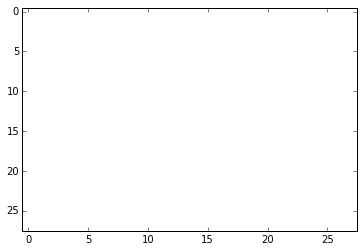

step 28000, train accuracy 0.06
step 28100, train accuracy 0.16
step 28200, train accuracy 0.14
step 28300, train accuracy 0.18
step 28400, train accuracy 0.08
step 28500, train accuracy 0.06
step 28600, train accuracy 0.14
step 28700, train accuracy 0.08
step 28800, train accuracy 0.04
step 28900, train accuracy 0.2
Reconstruction of a 8


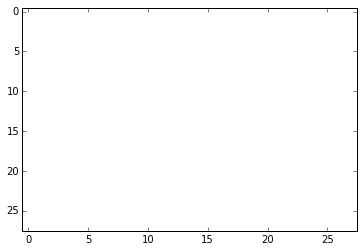

step 29000, train accuracy 0.08
step 29100, train accuracy 0.14
step 29200, train accuracy 0.1
step 29300, train accuracy 0.1
step 29400, train accuracy 0.12
step 29500, train accuracy 0.08
step 29600, train accuracy 0.08
step 29700, train accuracy 0.1
step 29800, train accuracy 0.08
step 29900, train accuracy 0.16
epoch 3, learning rate 1e-05
Reconstruction of a 2


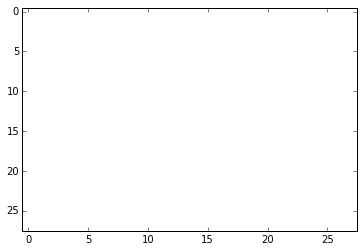

step 30000, train accuracy 0.12
step 30100, train accuracy 0.14
step 30200, train accuracy 0.1
step 30300, train accuracy 0.14
step 30400, train accuracy 0.08
step 30500, train accuracy 0.1
step 30600, train accuracy 0.16
step 30700, train accuracy 0.18
step 30800, train accuracy 0.08
step 30900, train accuracy 0.06
Reconstruction of a 9


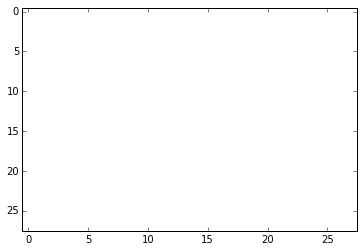

step 31000, train accuracy 0.08
step 31100, train accuracy 0.06
step 31200, train accuracy 0.06
step 31300, train accuracy 0.06
step 31400, train accuracy 0.08
step 31500, train accuracy 0.14
step 31600, train accuracy 0.16
step 31700, train accuracy 0.14
step 31800, train accuracy 0.14
step 31900, train accuracy 0.2
Reconstruction of a 5


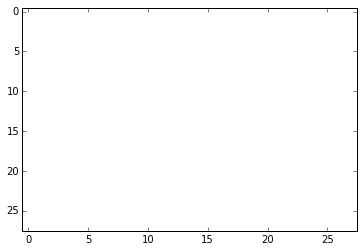

step 32000, train accuracy 0.1
step 32100, train accuracy 0.12
step 32200, train accuracy 0.1
step 32300, train accuracy 0.08
step 32400, train accuracy 0.04
step 32500, train accuracy 0.12
step 32600, train accuracy 0.12
step 32700, train accuracy 0.06
step 32800, train accuracy 0.14
step 32900, train accuracy 0.12
Reconstruction of a 3


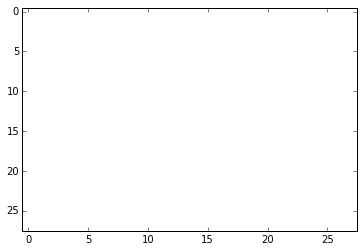

step 33000, train accuracy 0.02
step 33100, train accuracy 0.04
step 33200, train accuracy 0.1
step 33300, train accuracy 0.04
step 33400, train accuracy 0.08
step 33500, train accuracy 0.1
step 33600, train accuracy 0
step 33700, train accuracy 0.06
step 33800, train accuracy 0.12
step 33900, train accuracy 0.12
Reconstruction of a 5


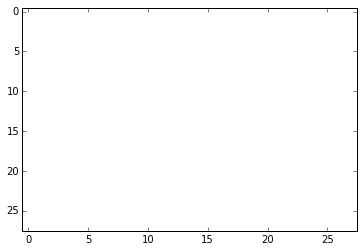

step 34000, train accuracy 0.04
step 34100, train accuracy 0.14
step 34200, train accuracy 0.08
step 34300, train accuracy 0.1
step 34400, train accuracy 0.08
step 34500, train accuracy 0.04
step 34600, train accuracy 0.14
step 34700, train accuracy 0.08
step 34800, train accuracy 0
step 34900, train accuracy 0.12
Reconstruction of a 0


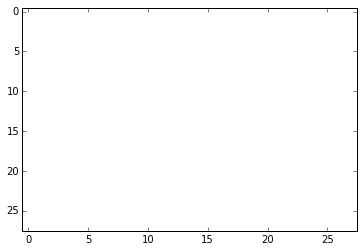

step 35000, train accuracy 0.04
step 35100, train accuracy 0.18
step 35200, train accuracy 0.08
step 35300, train accuracy 0.1
step 35400, train accuracy 0.16
step 35500, train accuracy 0.04
step 35600, train accuracy 0.1
step 35700, train accuracy 0.18
step 35800, train accuracy 0.06
step 35900, train accuracy 0.06
Reconstruction of a 2


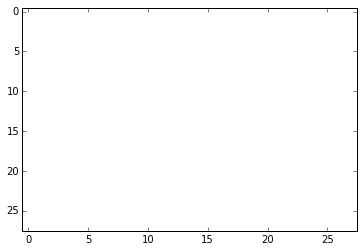

step 36000, train accuracy 0.04
step 36100, train accuracy 0.08
step 36200, train accuracy 0.1
step 36300, train accuracy 0.14
step 36400, train accuracy 0.08
step 36500, train accuracy 0.08
step 36600, train accuracy 0.06
step 36700, train accuracy 0.04
step 36800, train accuracy 0.04
step 36900, train accuracy 0.2
Reconstruction of a 6


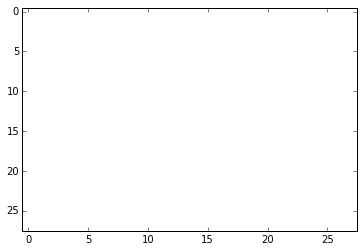

step 37000, train accuracy 0.08
step 37100, train accuracy 0.1
step 37200, train accuracy 0.14
step 37300, train accuracy 0.06
step 37400, train accuracy 0.08
step 37500, train accuracy 0.14
step 37600, train accuracy 0.1
step 37700, train accuracy 0.08
step 37800, train accuracy 0.18
step 37900, train accuracy 0.14
Reconstruction of a 5


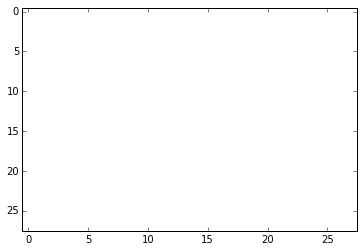

step 38000, train accuracy 0.08
step 38100, train accuracy 0.22
step 38200, train accuracy 0.06
step 38300, train accuracy 0.12
step 38400, train accuracy 0.14
step 38500, train accuracy 0.24
step 38600, train accuracy 0.16
step 38700, train accuracy 0.16
step 38800, train accuracy 0.06
step 38900, train accuracy 0.14
Reconstruction of a 0


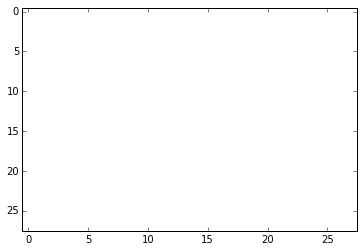

step 39000, train accuracy 0.1
step 39100, train accuracy 0.06
step 39200, train accuracy 0.14
step 39300, train accuracy 0.08
step 39400, train accuracy 0.08
step 39500, train accuracy 0.14
step 39600, train accuracy 0.1
step 39700, train accuracy 0.14
step 39800, train accuracy 0.08
step 39900, train accuracy 0.1
epoch 4, learning rate 4.64159e-06
Reconstruction of a 1


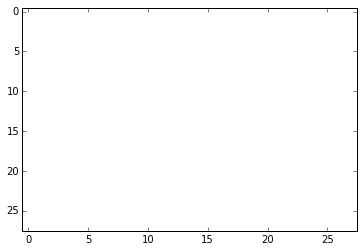

step 40000, train accuracy 0.08
step 40100, train accuracy 0.08
step 40200, train accuracy 0.04
step 40300, train accuracy 0.14
step 40400, train accuracy 0
step 40500, train accuracy 0.1
step 40600, train accuracy 0.14
step 40700, train accuracy 0.2
step 40800, train accuracy 0.1
step 40900, train accuracy 0.1
Reconstruction of a 8


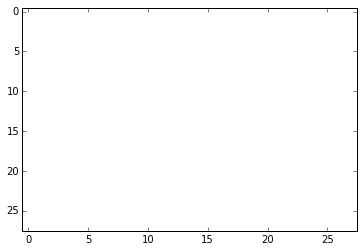

step 41000, train accuracy 0.08
step 41100, train accuracy 0.06
step 41200, train accuracy 0.1
step 41300, train accuracy 0.08
step 41400, train accuracy 0.04
step 41500, train accuracy 0.08
step 41600, train accuracy 0.12
step 41700, train accuracy 0.12
step 41800, train accuracy 0.06
step 41900, train accuracy 0.1
Reconstruction of a 5


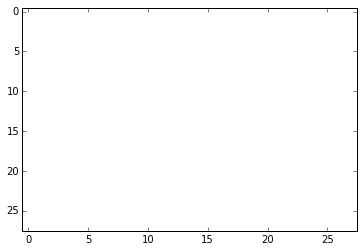

step 42000, train accuracy 0.04
step 42100, train accuracy 0.12
step 42200, train accuracy 0.16
step 42300, train accuracy 0.14
step 42400, train accuracy 0.12
step 42500, train accuracy 0.1
step 42600, train accuracy 0.08
step 42700, train accuracy 0.06
step 42800, train accuracy 0.08
step 42900, train accuracy 0.1
Reconstruction of a 7


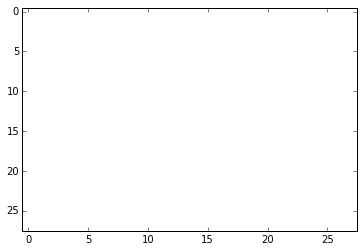

step 43000, train accuracy 0.14
step 43100, train accuracy 0.06
step 43200, train accuracy 0.1
step 43300, train accuracy 0.04
step 43400, train accuracy 0.02
step 43500, train accuracy 0.14
step 43600, train accuracy 0.14
step 43700, train accuracy 0.12
step 43800, train accuracy 0.12
step 43900, train accuracy 0.02
Reconstruction of a 3


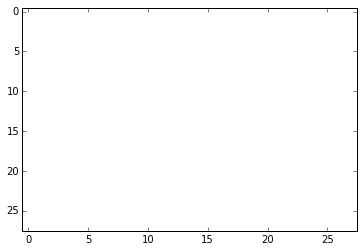

step 44000, train accuracy 0.1
step 44100, train accuracy 0.18
step 44200, train accuracy 0.16
step 44300, train accuracy 0.12
step 44400, train accuracy 0.06
step 44500, train accuracy 0.12
step 44600, train accuracy 0.1
step 44700, train accuracy 0.08
step 44800, train accuracy 0.08
step 44900, train accuracy 0.06
Reconstruction of a 5


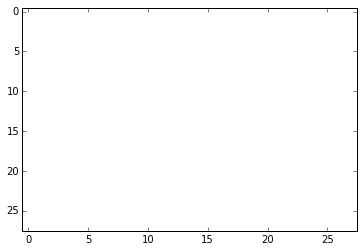

step 45000, train accuracy 0.1
step 45100, train accuracy 0.18
step 45200, train accuracy 0.1
step 45300, train accuracy 0.08
step 45400, train accuracy 0.12
step 45500, train accuracy 0.12
step 45600, train accuracy 0.14
step 45700, train accuracy 0.1
step 45800, train accuracy 0.06
step 45900, train accuracy 0.04
Reconstruction of a 2


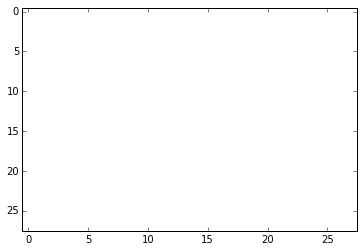

step 46000, train accuracy 0.04
step 46100, train accuracy 0.1
step 46200, train accuracy 0.1
step 46300, train accuracy 0.08
step 46400, train accuracy 0.02
step 46500, train accuracy 0.14
step 46600, train accuracy 0.08
step 46700, train accuracy 0.06
step 46800, train accuracy 0.14
step 46900, train accuracy 0.08
Reconstruction of a 8


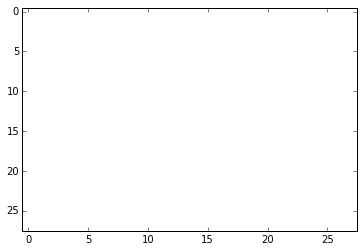

step 47000, train accuracy 0.18
step 47100, train accuracy 0.06
step 47200, train accuracy 0.08
step 47300, train accuracy 0.16
step 47400, train accuracy 0.1
step 47500, train accuracy 0.06
step 47600, train accuracy 0.18
step 47700, train accuracy 0.06
step 47800, train accuracy 0.06
step 47900, train accuracy 0.22
Reconstruction of a 9


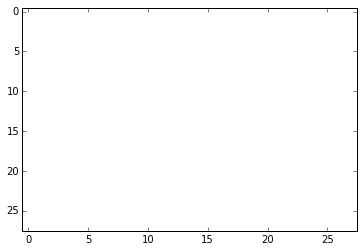

step 48000, train accuracy 0.16
step 48100, train accuracy 0.14
step 48200, train accuracy 0.1
step 48300, train accuracy 0.08
step 48400, train accuracy 0.1
step 48500, train accuracy 0.14
step 48600, train accuracy 0.08
step 48700, train accuracy 0.1
step 48800, train accuracy 0.06
step 48900, train accuracy 0.08
Reconstruction of a 9


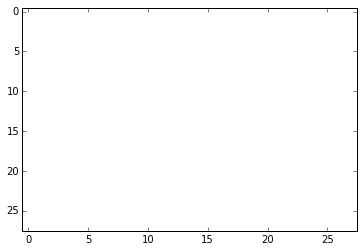

step 49000, train accuracy 0.06
step 49100, train accuracy 0.08
step 49200, train accuracy 0.08
step 49300, train accuracy 0.04
step 49400, train accuracy 0.12
step 49500, train accuracy 0.12
step 49600, train accuracy 0.12
step 49700, train accuracy 0.1
step 49800, train accuracy 0.12
step 49900, train accuracy 0.1
epoch 5, learning rate 2.15443e-06
Reconstruction of a 1


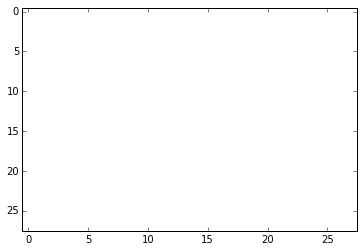

step 50000, train accuracy 0.16
step 50100, train accuracy 0.1
step 50200, train accuracy 0.08
step 50300, train accuracy 0.04
step 50400, train accuracy 0.1
step 50500, train accuracy 0.08
step 50600, train accuracy 0.06
step 50700, train accuracy 0.18
step 50800, train accuracy 0.14
step 50900, train accuracy 0.22
Reconstruction of a 7


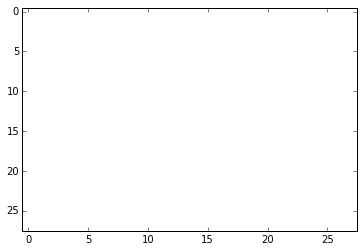

step 51000, train accuracy 0.08
step 51100, train accuracy 0.1
step 51200, train accuracy 0.16
step 51300, train accuracy 0.12
step 51400, train accuracy 0.08
step 51500, train accuracy 0.1
step 51600, train accuracy 0.1
step 51700, train accuracy 0.14
step 51800, train accuracy 0.12
step 51900, train accuracy 0.06
Reconstruction of a 9


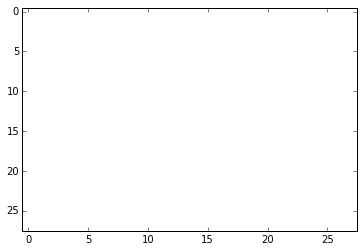

step 52000, train accuracy 0.12
step 52100, train accuracy 0.1
step 52200, train accuracy 0.04
step 52300, train accuracy 0.12
step 52400, train accuracy 0.08
step 52500, train accuracy 0.04
step 52600, train accuracy 0.12
step 52700, train accuracy 0.12
step 52800, train accuracy 0.08
step 52900, train accuracy 0.1
Reconstruction of a 1


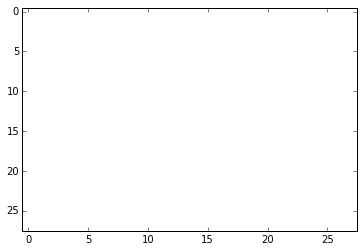

step 53000, train accuracy 0.08
step 53100, train accuracy 0.12
step 53200, train accuracy 0.08
step 53300, train accuracy 0.02
step 53400, train accuracy 0.12
step 53500, train accuracy 0.08
step 53600, train accuracy 0.08
step 53700, train accuracy 0.2
step 53800, train accuracy 0.08
step 53900, train accuracy 0.06
Reconstruction of a 9


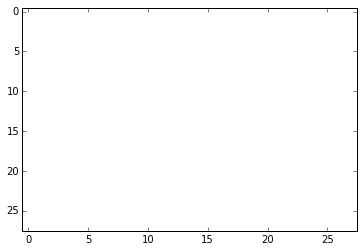

step 54000, train accuracy 0.12
step 54100, train accuracy 0.14
step 54200, train accuracy 0.12
step 54300, train accuracy 0.08
step 54400, train accuracy 0.08
step 54500, train accuracy 0.14
step 54600, train accuracy 0.12
step 54700, train accuracy 0.08
step 54800, train accuracy 0.04
step 54900, train accuracy 0.1
Reconstruction of a 9


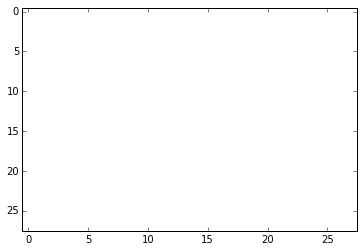

step 55000, train accuracy 0.14
step 55100, train accuracy 0.06
step 55200, train accuracy 0.06
step 55300, train accuracy 0.14
step 55400, train accuracy 0.16
step 55500, train accuracy 0.16
step 55600, train accuracy 0.04
step 55700, train accuracy 0.04
step 55800, train accuracy 0.14
step 55900, train accuracy 0.12
Reconstruction of a 0


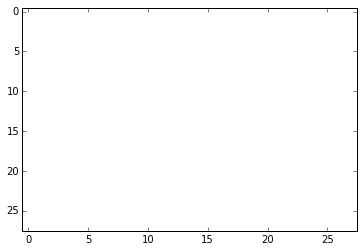

step 56000, train accuracy 0.14
step 56100, train accuracy 0.08
step 56200, train accuracy 0.06
step 56300, train accuracy 0.12
step 56400, train accuracy 0.08
step 56500, train accuracy 0.08
step 56600, train accuracy 0.12
step 56700, train accuracy 0.08
step 56800, train accuracy 0.04
step 56900, train accuracy 0.06
Reconstruction of a 3


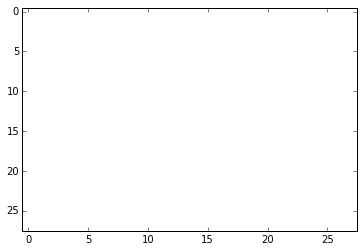

step 57000, train accuracy 0.14
step 57100, train accuracy 0.12
step 57200, train accuracy 0.14
step 57300, train accuracy 0.14
step 57400, train accuracy 0.06
step 57500, train accuracy 0.14
step 57600, train accuracy 0.12
step 57700, train accuracy 0.06
step 57800, train accuracy 0.12
step 57900, train accuracy 0.08
Reconstruction of a 4


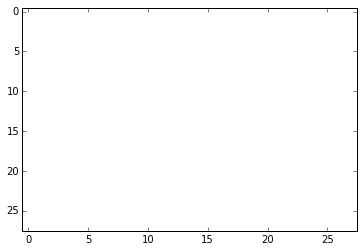

step 58000, train accuracy 0.14
step 58100, train accuracy 0.12
step 58200, train accuracy 0.08
step 58300, train accuracy 0.12
step 58400, train accuracy 0.16
step 58500, train accuracy 0.06
step 58600, train accuracy 0.08
step 58700, train accuracy 0.08
step 58800, train accuracy 0.08
step 58900, train accuracy 0.12
Reconstruction of a 0


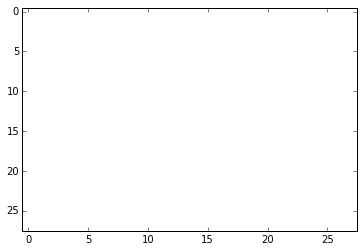

step 59000, train accuracy 0.12
step 59100, train accuracy 0.1
step 59200, train accuracy 0.12
step 59300, train accuracy 0.16
step 59400, train accuracy 0.06
step 59500, train accuracy 0.12
step 59600, train accuracy 0.12
step 59700, train accuracy 0.14
step 59800, train accuracy 0.12
step 59900, train accuracy 0.04
epoch 6, learning rate 1e-06
Reconstruction of a 0


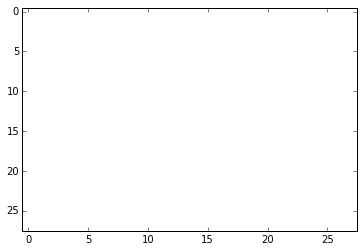

step 60000, train accuracy 0.04
step 60100, train accuracy 0.08
step 60200, train accuracy 0.04
step 60300, train accuracy 0.08
step 60400, train accuracy 0.04
step 60500, train accuracy 0.1
step 60600, train accuracy 0.14
step 60700, train accuracy 0.08
step 60800, train accuracy 0.14
step 60900, train accuracy 0.02
Reconstruction of a 1


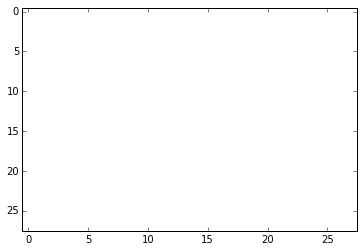

step 61000, train accuracy 0.04
step 61100, train accuracy 0.1
step 61200, train accuracy 0.14
step 61300, train accuracy 0.06
step 61400, train accuracy 0.04
step 61500, train accuracy 0.04
step 61600, train accuracy 0.06
step 61700, train accuracy 0.1
step 61800, train accuracy 0.1
step 61900, train accuracy 0.06
Reconstruction of a 9


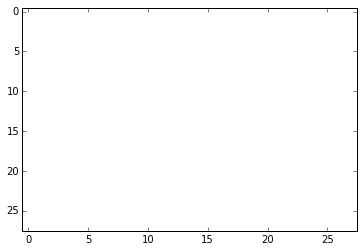

step 62000, train accuracy 0.12
step 62100, train accuracy 0.04
step 62200, train accuracy 0.14
step 62300, train accuracy 0.12
step 62400, train accuracy 0.12
step 62500, train accuracy 0.08
step 62600, train accuracy 0.16
step 62700, train accuracy 0.1
step 62800, train accuracy 0.1
step 62900, train accuracy 0.14
Reconstruction of a 7


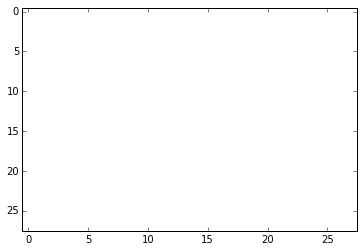

step 63000, train accuracy 0.1
step 63100, train accuracy 0.06
step 63200, train accuracy 0.1
step 63300, train accuracy 0.02
step 63400, train accuracy 0.1
step 63500, train accuracy 0.2
step 63600, train accuracy 0.14
step 63700, train accuracy 0.1
step 63800, train accuracy 0.08
step 63900, train accuracy 0.14
Reconstruction of a 0


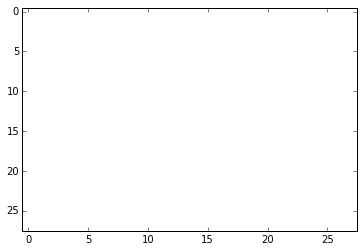

step 64000, train accuracy 0.1
step 64100, train accuracy 0.1
step 64200, train accuracy 0.08
step 64300, train accuracy 0.02
step 64400, train accuracy 0.14
step 64500, train accuracy 0.04
step 64600, train accuracy 0.16
step 64700, train accuracy 0.06
step 64800, train accuracy 0.1
step 64900, train accuracy 0.2
Reconstruction of a 7


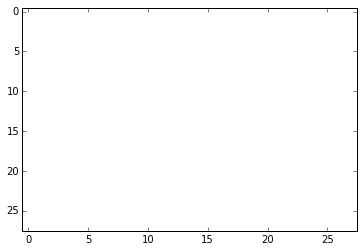

step 65000, train accuracy 0.14
step 65100, train accuracy 0.04
step 65200, train accuracy 0.06
step 65300, train accuracy 0.02
step 65400, train accuracy 0.08
step 65500, train accuracy 0.12
step 65600, train accuracy 0.14
step 65700, train accuracy 0.06
step 65800, train accuracy 0.08
step 65900, train accuracy 0.04
Reconstruction of a 5


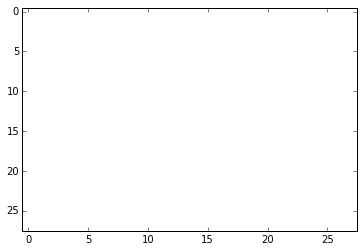

step 66000, train accuracy 0.16
step 66100, train accuracy 0.06
step 66200, train accuracy 0.06
step 66300, train accuracy 0.08
step 66400, train accuracy 0.06
step 66500, train accuracy 0.26
step 66600, train accuracy 0.12
step 66700, train accuracy 0.14
step 66800, train accuracy 0.08
step 66900, train accuracy 0.12
Reconstruction of a 8


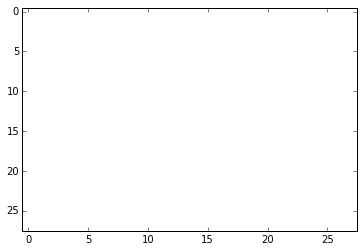

step 67000, train accuracy 0.12
step 67100, train accuracy 0.1
step 67200, train accuracy 0.12
step 67300, train accuracy 0.14
step 67400, train accuracy 0.14
step 67500, train accuracy 0.08
step 67600, train accuracy 0.06
step 67700, train accuracy 0.06
step 67800, train accuracy 0.06
step 67900, train accuracy 0.1
Reconstruction of a 7


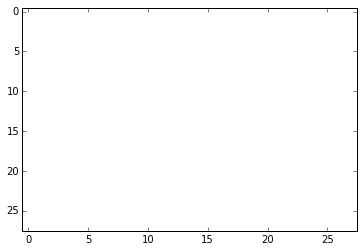

step 68000, train accuracy 0.12
step 68100, train accuracy 0.04
step 68200, train accuracy 0.06
step 68300, train accuracy 0.06
step 68400, train accuracy 0.16
step 68500, train accuracy 0.1
step 68600, train accuracy 0.06
step 68700, train accuracy 0.1
step 68800, train accuracy 0.16
step 68900, train accuracy 0.12
Reconstruction of a 6


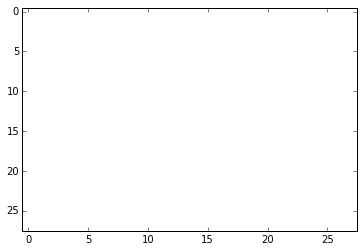

step 69000, train accuracy 0.18
step 69100, train accuracy 0.14
step 69200, train accuracy 0.1
step 69300, train accuracy 0.12
step 69400, train accuracy 0.14
step 69500, train accuracy 0.14
step 69600, train accuracy 0.1
step 69700, train accuracy 0.04
step 69800, train accuracy 0.08
step 69900, train accuracy 0.1
epoch 7, learning rate 4.64159e-07
Reconstruction of a 7


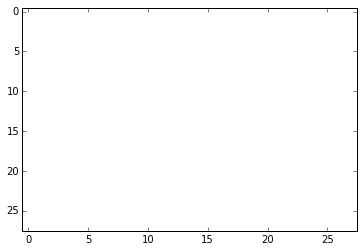

step 70000, train accuracy 0.1
step 70100, train accuracy 0.12
step 70200, train accuracy 0.1
step 70300, train accuracy 0.08
step 70400, train accuracy 0.1
step 70500, train accuracy 0.04
step 70600, train accuracy 0.1
step 70700, train accuracy 0.12
step 70800, train accuracy 0.06
step 70900, train accuracy 0.08
Reconstruction of a 3


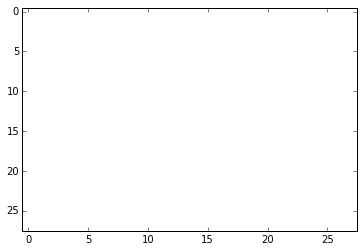

step 71000, train accuracy 0.1
step 71100, train accuracy 0.06
step 71200, train accuracy 0.1
step 71300, train accuracy 0.18
step 71400, train accuracy 0.22
step 71500, train accuracy 0.04
step 71600, train accuracy 0.12
step 71700, train accuracy 0.1
step 71800, train accuracy 0.08
step 71900, train accuracy 0.14
Reconstruction of a 9


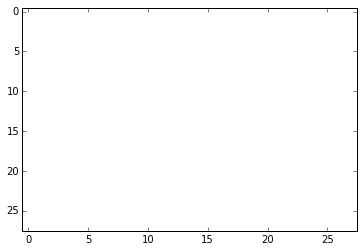

step 72000, train accuracy 0.16
step 72100, train accuracy 0.04
step 72200, train accuracy 0.06
step 72300, train accuracy 0.06
step 72400, train accuracy 0.1
step 72500, train accuracy 0.12
step 72600, train accuracy 0.22
step 72700, train accuracy 0.04
step 72800, train accuracy 0.06
step 72900, train accuracy 0.04
Reconstruction of a 1


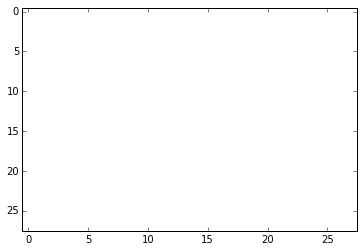

step 73000, train accuracy 0.06
step 73100, train accuracy 0.14
step 73200, train accuracy 0.02
step 73300, train accuracy 0.1
step 73400, train accuracy 0.06
step 73500, train accuracy 0.1
step 73600, train accuracy 0.1
step 73700, train accuracy 0.08
step 73800, train accuracy 0.04
step 73900, train accuracy 0.18
Reconstruction of a 2


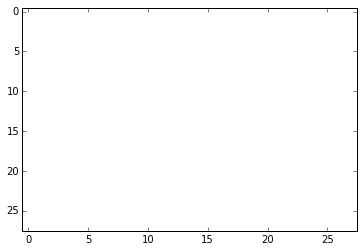

step 74000, train accuracy 0.06
step 74100, train accuracy 0.14
step 74200, train accuracy 0.12
step 74300, train accuracy 0.08
step 74400, train accuracy 0.06
step 74500, train accuracy 0.12
step 74600, train accuracy 0.18
step 74700, train accuracy 0.12
step 74800, train accuracy 0.04
step 74900, train accuracy 0.06
Reconstruction of a 9


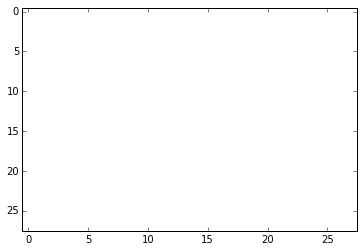

step 75000, train accuracy 0.12
step 75100, train accuracy 0.14
step 75200, train accuracy 0.08
step 75300, train accuracy 0.12
step 75400, train accuracy 0.12
step 75500, train accuracy 0.1
step 75600, train accuracy 0.14
step 75700, train accuracy 0.1
step 75800, train accuracy 0.08
step 75900, train accuracy 0.04
Reconstruction of a 7


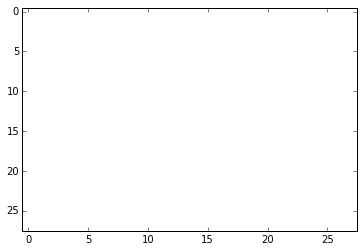

step 76000, train accuracy 0.12
step 76100, train accuracy 0.12
step 76200, train accuracy 0.16
step 76300, train accuracy 0.06
step 76400, train accuracy 0.16
step 76500, train accuracy 0.12
step 76600, train accuracy 0.1
step 76700, train accuracy 0.04
step 76800, train accuracy 0.18
step 76900, train accuracy 0.04
Reconstruction of a 3


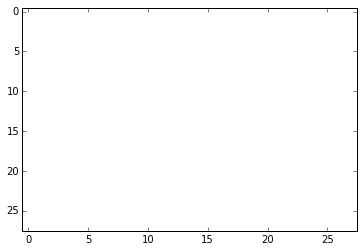

step 77000, train accuracy 0.1
step 77100, train accuracy 0.04
step 77200, train accuracy 0.14
step 77300, train accuracy 0.08
step 77400, train accuracy 0.1
step 77500, train accuracy 0.1
step 77600, train accuracy 0.08
step 77700, train accuracy 0.02
step 77800, train accuracy 0.12
step 77900, train accuracy 0.1
Reconstruction of a 2


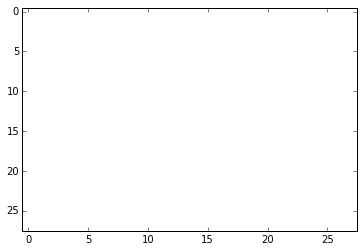

step 78000, train accuracy 0.1
step 78100, train accuracy 0.16
step 78200, train accuracy 0.14
step 78300, train accuracy 0.06
step 78400, train accuracy 0.12
step 78500, train accuracy 0.12
step 78600, train accuracy 0.04
step 78700, train accuracy 0.12
step 78800, train accuracy 0.08
step 78900, train accuracy 0.16
Reconstruction of a 1


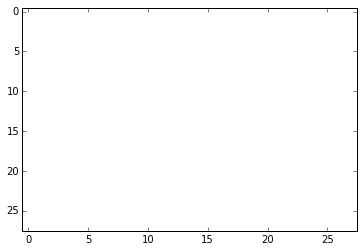

step 79000, train accuracy 0.04
step 79100, train accuracy 0.12
step 79200, train accuracy 0.04
step 79300, train accuracy 0.02
step 79400, train accuracy 0.08
step 79500, train accuracy 0.1
step 79600, train accuracy 0.14
step 79700, train accuracy 0.1
step 79800, train accuracy 0.14
step 79900, train accuracy 0.1
epoch 8, learning rate 2.15443e-07
Reconstruction of a 0


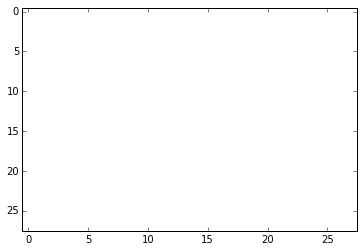

step 80000, train accuracy 0.1
step 80100, train accuracy 0.14
step 80200, train accuracy 0.12
step 80300, train accuracy 0.16
step 80400, train accuracy 0.12
step 80500, train accuracy 0.1
step 80600, train accuracy 0.08
step 80700, train accuracy 0.12
step 80800, train accuracy 0.12
step 80900, train accuracy 0.04
Reconstruction of a 5


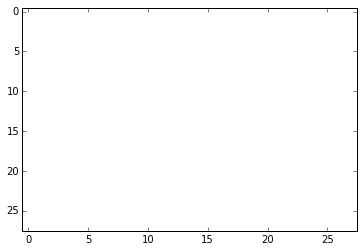

step 81000, train accuracy 0.16
step 81100, train accuracy 0.14
step 81200, train accuracy 0.04
step 81300, train accuracy 0.2
step 81400, train accuracy 0.16
step 81500, train accuracy 0.06
step 81600, train accuracy 0.06
step 81700, train accuracy 0.02
step 81800, train accuracy 0.1
step 81900, train accuracy 0.1
Reconstruction of a 7


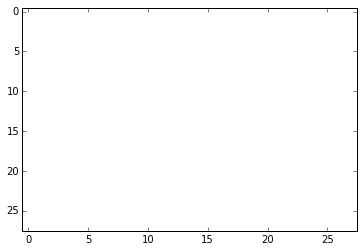

step 82000, train accuracy 0.12
step 82100, train accuracy 0.06
step 82200, train accuracy 0.1
step 82300, train accuracy 0.16
step 82400, train accuracy 0.14
step 82500, train accuracy 0.16
step 82600, train accuracy 0.14
step 82700, train accuracy 0.08
step 82800, train accuracy 0.1
step 82900, train accuracy 0.12
Reconstruction of a 0


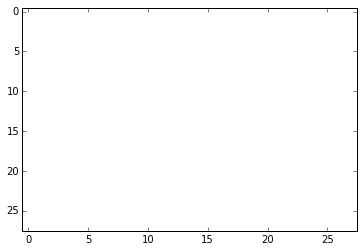

step 83000, train accuracy 0.12
step 83100, train accuracy 0.12
step 83200, train accuracy 0.1
step 83300, train accuracy 0.1
step 83400, train accuracy 0.06
step 83500, train accuracy 0.12
step 83600, train accuracy 0.08
step 83700, train accuracy 0.18
step 83800, train accuracy 0.04
step 83900, train accuracy 0.08
Reconstruction of a 9


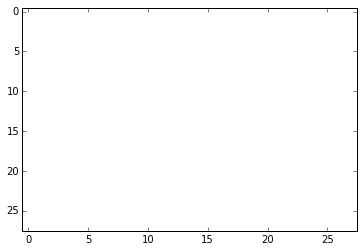

step 84000, train accuracy 0.08
step 84100, train accuracy 0.12
step 84200, train accuracy 0.1
step 84300, train accuracy 0.08
step 84400, train accuracy 0.08
step 84500, train accuracy 0.02
step 84600, train accuracy 0.1
step 84700, train accuracy 0.02
step 84800, train accuracy 0.18
step 84900, train accuracy 0.08
Reconstruction of a 9


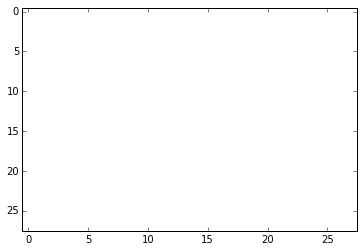

step 85000, train accuracy 0.16
step 85100, train accuracy 0.14
step 85200, train accuracy 0.04
step 85300, train accuracy 0.08
step 85400, train accuracy 0.2
step 85500, train accuracy 0.2
step 85600, train accuracy 0.14
step 85700, train accuracy 0.1
step 85800, train accuracy 0.16
step 85900, train accuracy 0.08
Reconstruction of a 6


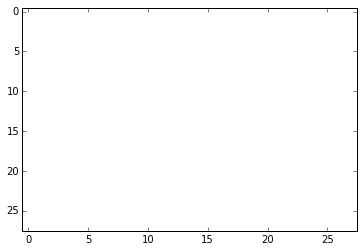

step 86000, train accuracy 0.08
step 86100, train accuracy 0.1
step 86200, train accuracy 0.08
step 86300, train accuracy 0.1
step 86400, train accuracy 0.12
step 86500, train accuracy 0.2
step 86600, train accuracy 0.18
step 86700, train accuracy 0.12
step 86800, train accuracy 0.06
step 86900, train accuracy 0.08
Reconstruction of a 1


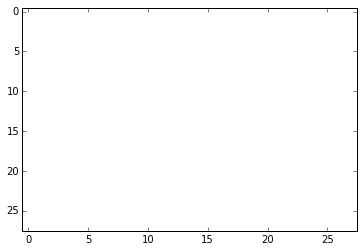

step 87000, train accuracy 0.1
step 87100, train accuracy 0.02
step 87200, train accuracy 0.18
step 87300, train accuracy 0.04
step 87400, train accuracy 0.06
step 87500, train accuracy 0.06
step 87600, train accuracy 0.12
step 87700, train accuracy 0.1
step 87800, train accuracy 0
step 87900, train accuracy 0.16
Reconstruction of a 3


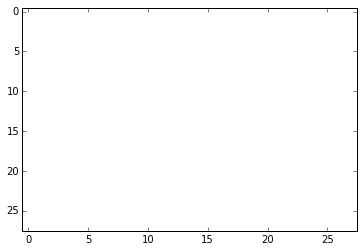

step 88000, train accuracy 0.1
step 88100, train accuracy 0.04


KeyboardInterrupt: 

In [8]:
with tf.Graph().as_default(): 
  with tf.name_scope('common'):
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    # x_r = tf.placeholder(tf.float32, shape=[None, 784])
    learning_rate = tf.placeholder(tf.float32, shape=[])

    W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_2 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
    b_2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_3 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
    b_3 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_4 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
    b_4 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

    a = tf.nn.relu(tf.matmul(x, W) + b)
    a_2 = tf.nn.relu(tf.matmul(a, W_2) + b_2)
    a_3 = tf.nn.relu(tf.matmul(a_2, W_3) + b_3)
    y = tf.nn.sigmoid(tf.matmul(a_3, W_4) + b_4)

  with tf.name_scope('backwards'):
    a_2_r = tf.nn.relu(tf.matmul(a_3 - b_3, tf.transpose(W_3)))
    a_r = tf.nn.relu(tf.matmul(a_2_r - b_2, tf.transpose(W_2)))
    x_r = tf.matmul(a_r - b, tf.transpose(W))

  global_step = tf.Variable(0, name='global_step', trainable=False)

  # losses
  cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), 
                                              reduction_indices=[1]),
                              name='xentropy_mean')
  tf.scalar_summary(cross_entropy.op.name, cross_entropy)

  reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]),
                                      name='reconstruction_l2_mean_error')
  tf.scalar_summary(reconstruction_error.op.name, reconstruction_error)

  # training
  # train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
  train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy, 
                                                            global_step=global_step)
  back_train_step = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_error)

  # evaluation
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  ########## INIT AND SUMMARY HAVE TO APPEAR HERE AT THE END TO BE PROPERLY DEFINED
  # misc
  init = tf.initialize_all_variables()
  summary_op = tf.merge_all_summaries()

  with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.train.SummaryWriter('./mnist_relu_3hl/standard_adam', sess.graph)

    num_epochs = 10
    steps_per_epoch = 10000
    for epoch in range(num_epochs):
      l_r = 10**np.linspace(-4,-7,num_epochs)[epoch]
      print("epoch %d, learning rate %g"%(epoch,l_r))

      for step in range(steps_per_epoch):
        batch = mnist.train.next_batch(50)
        feed_dict = {x: batch[0], y_: batch[1], learning_rate: l_r}

        if step%1000 == 0:
          reconstruction = x_r.eval(feed_dict=feed_dict)
          print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
          plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
          plt.show()

        if step%100 == 0:
          train_accuracy = accuracy.eval(feed_dict=feed_dict)
          print("step %d, train accuracy %g"%(step + epoch*steps_per_epoch, train_accuracy))
          summary_str = sess.run(summary_op, feed_dict=feed_dict)
          summary_writer.add_summary(summary_str, step + epoch*steps_per_epoch)
          summary_writer.flush()

        train_step.run(feed_dict=feed_dict)
#         back_train_step.run(feed_dict=feed_dict)

    print("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))

epoch 0, learning rate 0.0001
Reconstruction of a 1


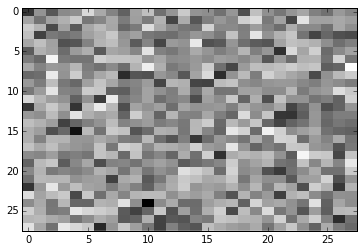

step 0, train accuracy 0.22
step 100, train accuracy 0.02
step 200, train accuracy 0.12
step 300, train accuracy 0.14
step 400, train accuracy 0.1
step 500, train accuracy 0.08
step 600, train accuracy 0.1
step 700, train accuracy 0.18
step 800, train accuracy 0.06
step 900, train accuracy 0.1
Reconstruction of a 4


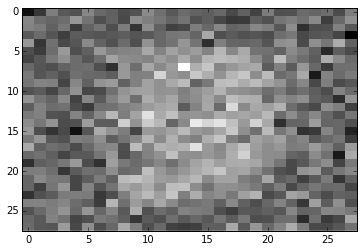

step 1000, train accuracy 0.12
step 1100, train accuracy 0.2
step 1200, train accuracy 0.14
step 1300, train accuracy 0.18
step 1400, train accuracy 0.18
step 1500, train accuracy 0.1
step 1600, train accuracy 0.12
step 1700, train accuracy 0.22
step 1800, train accuracy 0.16
step 1900, train accuracy 0.1
Reconstruction of a 9


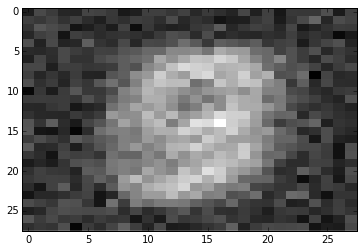

step 2000, train accuracy 0.18
step 2100, train accuracy 0.08
step 2200, train accuracy 0.16
step 2300, train accuracy 0.2
step 2400, train accuracy 0.22
step 2500, train accuracy 0.2
step 2600, train accuracy 0.2
step 2700, train accuracy 0.2
step 2800, train accuracy 0.2
step 2900, train accuracy 0.16
Reconstruction of a 0


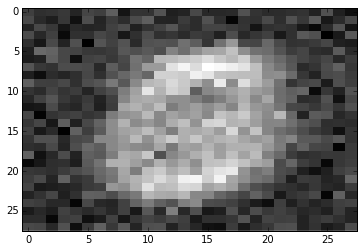

step 3000, train accuracy 0.24
step 3100, train accuracy 0.2
step 3200, train accuracy 0.28
step 3300, train accuracy 0.22
step 3400, train accuracy 0.18
step 3500, train accuracy 0.14
step 3600, train accuracy 0.3
step 3700, train accuracy 0.22
step 3800, train accuracy 0.22
step 3900, train accuracy 0.18
Reconstruction of a 4


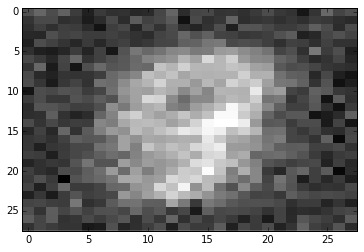

step 4000, train accuracy 0.18
step 4100, train accuracy 0.34
step 4200, train accuracy 0.26
step 4300, train accuracy 0.26
step 4400, train accuracy 0.34
step 4500, train accuracy 0.22
step 4600, train accuracy 0.26
step 4700, train accuracy 0.26
step 4800, train accuracy 0.3
step 4900, train accuracy 0.22
Reconstruction of a 5


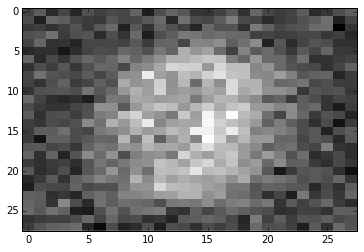

step 5000, train accuracy 0.24
step 5100, train accuracy 0.22
step 5200, train accuracy 0.2
step 5300, train accuracy 0.18
step 5400, train accuracy 0.18
step 5500, train accuracy 0.42
step 5600, train accuracy 0.38
step 5700, train accuracy 0.32
step 5800, train accuracy 0.18
step 5900, train accuracy 0.34
Reconstruction of a 3


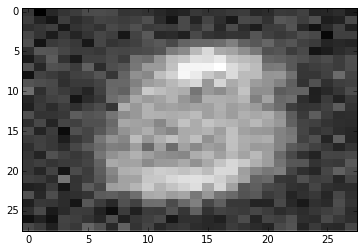

step 6000, train accuracy 0.36
step 6100, train accuracy 0.34
step 6200, train accuracy 0.4
step 6300, train accuracy 0.4
step 6400, train accuracy 0.4
step 6500, train accuracy 0.32
step 6600, train accuracy 0.34
step 6700, train accuracy 0.36
step 6800, train accuracy 0.44
step 6900, train accuracy 0.52
Reconstruction of a 7


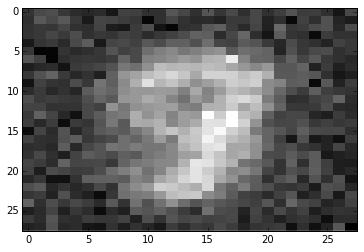

step 7000, train accuracy 0.34
step 7100, train accuracy 0.36
step 7200, train accuracy 0.38
step 7300, train accuracy 0.4
step 7400, train accuracy 0.32
step 7500, train accuracy 0.4
step 7600, train accuracy 0.4
step 7700, train accuracy 0.36
step 7800, train accuracy 0.36
step 7900, train accuracy 0.4
Reconstruction of a 5


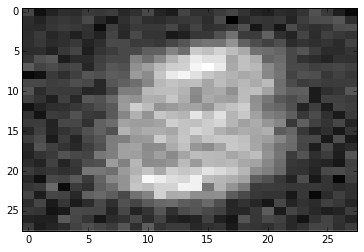

step 8000, train accuracy 0.3
step 8100, train accuracy 0.28
step 8200, train accuracy 0.44
step 8300, train accuracy 0.34
step 8400, train accuracy 0.48
step 8500, train accuracy 0.48
step 8600, train accuracy 0.48
step 8700, train accuracy 0.42
step 8800, train accuracy 0.32
step 8900, train accuracy 0.3
Reconstruction of a 5


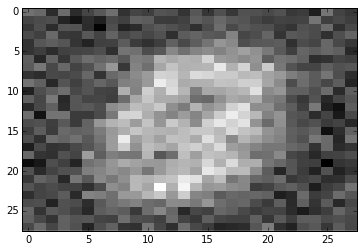

step 9000, train accuracy 0.38
step 9100, train accuracy 0.34
step 9200, train accuracy 0.4
step 9300, train accuracy 0.4
step 9400, train accuracy 0.6
step 9500, train accuracy 0.54
step 9600, train accuracy 0.46
step 9700, train accuracy 0.44
step 9800, train accuracy 0.5
step 9900, train accuracy 0.36
epoch 1, learning rate 4.64159e-05
Reconstruction of a 1


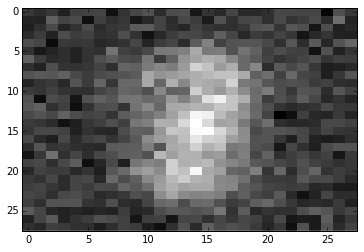

step 10000, train accuracy 0.66
step 10100, train accuracy 0.56
step 10200, train accuracy 0.54
step 10300, train accuracy 0.56
step 10400, train accuracy 0.52
step 10500, train accuracy 0.58
step 10600, train accuracy 0.44
step 10700, train accuracy 0.6
step 10800, train accuracy 0.64
step 10900, train accuracy 0.62
Reconstruction of a 1


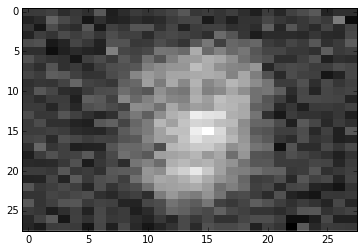

step 11000, train accuracy 0.48
step 11100, train accuracy 0.54
step 11200, train accuracy 0.42
step 11300, train accuracy 0.52
step 11400, train accuracy 0.36
step 11500, train accuracy 0.58
step 11600, train accuracy 0.44
step 11700, train accuracy 0.44
step 11800, train accuracy 0.5
step 11900, train accuracy 0.52
Reconstruction of a 8


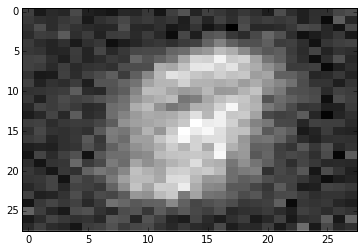

step 12000, train accuracy 0.5
step 12100, train accuracy 0.56
step 12200, train accuracy 0.46
step 12300, train accuracy 0.58
step 12400, train accuracy 0.5
step 12500, train accuracy 0.48
step 12600, train accuracy 0.48
step 12700, train accuracy 0.64
step 12800, train accuracy 0.64
step 12900, train accuracy 0.6
Reconstruction of a 7


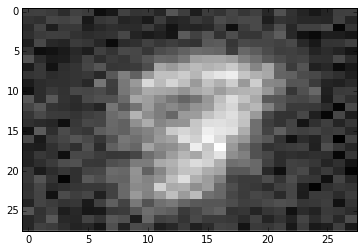

step 13000, train accuracy 0.4
step 13100, train accuracy 0.42
step 13200, train accuracy 0.52
step 13300, train accuracy 0.54
step 13400, train accuracy 0.48
step 13500, train accuracy 0.5
step 13600, train accuracy 0.5
step 13700, train accuracy 0.56
step 13800, train accuracy 0.48
step 13900, train accuracy 0.52
Reconstruction of a 2


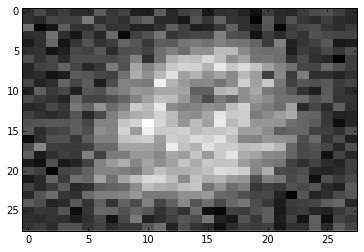

step 14000, train accuracy 0.52
step 14100, train accuracy 0.58
step 14200, train accuracy 0.56
step 14300, train accuracy 0.56
step 14400, train accuracy 0.66
step 14500, train accuracy 0.66
step 14600, train accuracy 0.68
step 14700, train accuracy 0.54
step 14800, train accuracy 0.56
step 14900, train accuracy 0.6
Reconstruction of a 3


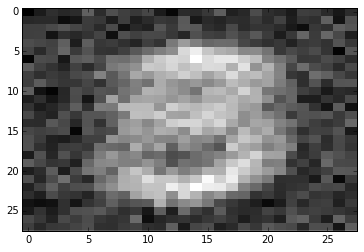

step 15000, train accuracy 0.56
step 15100, train accuracy 0.58
step 15200, train accuracy 0.64
step 15300, train accuracy 0.58
step 15400, train accuracy 0.48
step 15500, train accuracy 0.5
step 15600, train accuracy 0.5
step 15700, train accuracy 0.46
step 15800, train accuracy 0.54
step 15900, train accuracy 0.42
Reconstruction of a 1


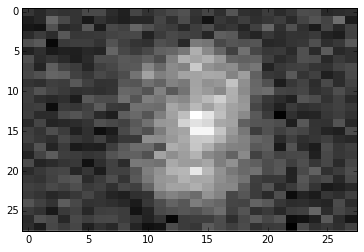

step 16000, train accuracy 0.58
step 16100, train accuracy 0.56
step 16200, train accuracy 0.64
step 16300, train accuracy 0.5
step 16400, train accuracy 0.66
step 16500, train accuracy 0.52
step 16600, train accuracy 0.56
step 16700, train accuracy 0.44
step 16800, train accuracy 0.64
step 16900, train accuracy 0.52
Reconstruction of a 2


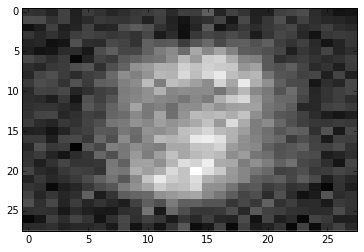

step 17000, train accuracy 0.5
step 17100, train accuracy 0.48
step 17200, train accuracy 0.46
step 17300, train accuracy 0.62
step 17400, train accuracy 0.58
step 17500, train accuracy 0.58
step 17600, train accuracy 0.64
step 17700, train accuracy 0.66
step 17800, train accuracy 0.56
step 17900, train accuracy 0.46
Reconstruction of a 6


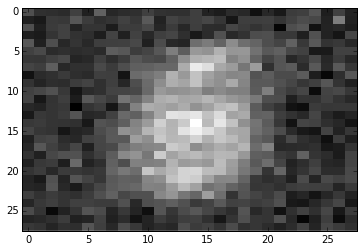

step 18000, train accuracy 0.54
step 18100, train accuracy 0.54
step 18200, train accuracy 0.52
step 18300, train accuracy 0.66
step 18400, train accuracy 0.48
step 18500, train accuracy 0.44
step 18600, train accuracy 0.62
step 18700, train accuracy 0.52
step 18800, train accuracy 0.6
step 18900, train accuracy 0.58
Reconstruction of a 5


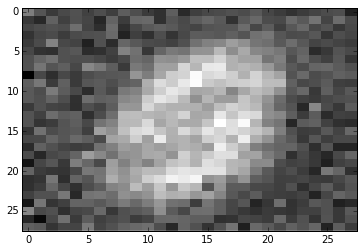

step 19000, train accuracy 0.56
step 19100, train accuracy 0.66
step 19200, train accuracy 0.62
step 19300, train accuracy 0.66
step 19400, train accuracy 0.54
step 19500, train accuracy 0.68
step 19600, train accuracy 0.52
step 19700, train accuracy 0.54
step 19800, train accuracy 0.66
step 19900, train accuracy 0.54
epoch 2, learning rate 2.15443e-05
Reconstruction of a 5


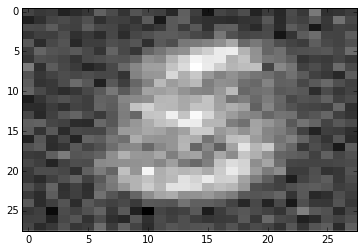

step 20000, train accuracy 0.56
step 20100, train accuracy 0.56
step 20200, train accuracy 0.46
step 20300, train accuracy 0.64
step 20400, train accuracy 0.6
step 20500, train accuracy 0.54
step 20600, train accuracy 0.58
step 20700, train accuracy 0.56
step 20800, train accuracy 0.52
step 20900, train accuracy 0.66
Reconstruction of a 6


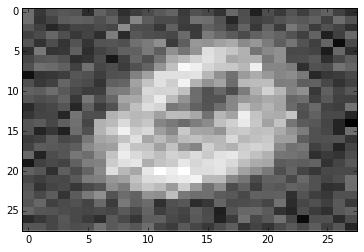

step 21000, train accuracy 0.58
step 21100, train accuracy 0.6
step 21200, train accuracy 0.58
step 21300, train accuracy 0.64
step 21400, train accuracy 0.56
step 21500, train accuracy 0.72
step 21600, train accuracy 0.68
step 21700, train accuracy 0.72
step 21800, train accuracy 0.56
step 21900, train accuracy 0.68
Reconstruction of a 0


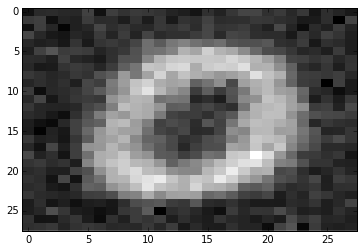

step 22000, train accuracy 0.5
step 22100, train accuracy 0.64
step 22200, train accuracy 0.52
step 22300, train accuracy 0.64
step 22400, train accuracy 0.6
step 22500, train accuracy 0.6
step 22600, train accuracy 0.68
step 22700, train accuracy 0.6
step 22800, train accuracy 0.62
step 22900, train accuracy 0.64
Reconstruction of a 7


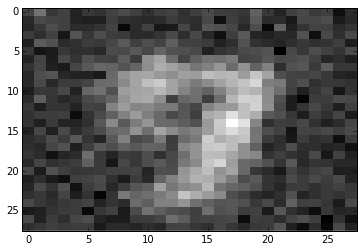

step 23000, train accuracy 0.6
step 23100, train accuracy 0.64
step 23200, train accuracy 0.66
step 23300, train accuracy 0.62
step 23400, train accuracy 0.58
step 23500, train accuracy 0.64
step 23600, train accuracy 0.62
step 23700, train accuracy 0.44
step 23800, train accuracy 0.5
step 23900, train accuracy 0.64
Reconstruction of a 1


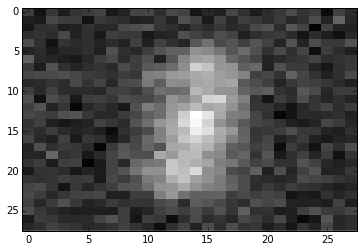

step 24000, train accuracy 0.6
step 24100, train accuracy 0.56
step 24200, train accuracy 0.62
step 24300, train accuracy 0.66
step 24400, train accuracy 0.62
step 24500, train accuracy 0.66
step 24600, train accuracy 0.54
step 24700, train accuracy 0.56
step 24800, train accuracy 0.62
step 24900, train accuracy 0.62
Reconstruction of a 8


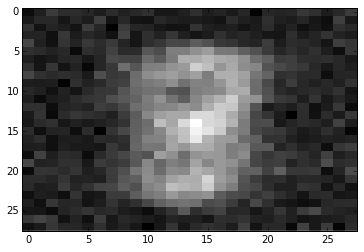

step 25000, train accuracy 0.6
step 25100, train accuracy 0.56
step 25200, train accuracy 0.58
step 25300, train accuracy 0.46
step 25400, train accuracy 0.52
step 25500, train accuracy 0.6
step 25600, train accuracy 0.5
step 25700, train accuracy 0.6
step 25800, train accuracy 0.56
step 25900, train accuracy 0.72
Reconstruction of a 4


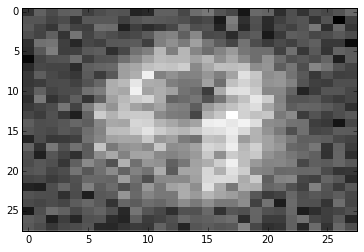

step 26000, train accuracy 0.6
step 26100, train accuracy 0.64
step 26200, train accuracy 0.64
step 26300, train accuracy 0.54
step 26400, train accuracy 0.64
step 26500, train accuracy 0.56
step 26600, train accuracy 0.62
step 26700, train accuracy 0.56
step 26800, train accuracy 0.7
step 26900, train accuracy 0.52
Reconstruction of a 6


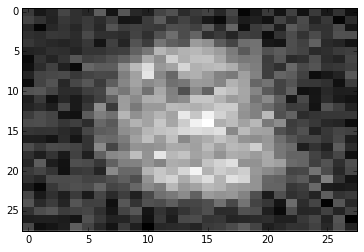

step 27000, train accuracy 0.6
step 27100, train accuracy 0.68
step 27200, train accuracy 0.54
step 27300, train accuracy 0.54
step 27400, train accuracy 0.66
step 27500, train accuracy 0.54
step 27600, train accuracy 0.62
step 27700, train accuracy 0.62
step 27800, train accuracy 0.56
step 27900, train accuracy 0.68
Reconstruction of a 2


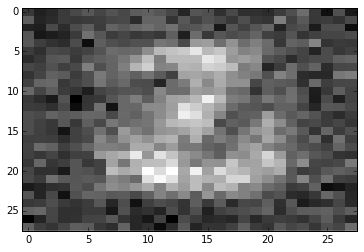

step 28000, train accuracy 0.6
step 28100, train accuracy 0.54
step 28200, train accuracy 0.64
step 28300, train accuracy 0.48
step 28400, train accuracy 0.7
step 28500, train accuracy 0.56
step 28600, train accuracy 0.68
step 28700, train accuracy 0.62
step 28800, train accuracy 0.6
step 28900, train accuracy 0.7
Reconstruction of a 4


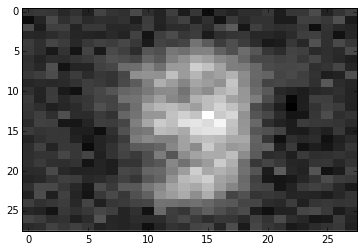

step 29000, train accuracy 0.48
step 29100, train accuracy 0.68
step 29200, train accuracy 0.72
step 29300, train accuracy 0.6
step 29400, train accuracy 0.58
step 29500, train accuracy 0.66
step 29600, train accuracy 0.62
step 29700, train accuracy 0.54
step 29800, train accuracy 0.6
step 29900, train accuracy 0.62
epoch 3, learning rate 1e-05
Reconstruction of a 3


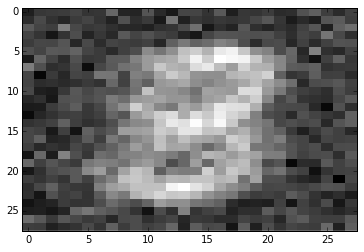

step 30000, train accuracy 0.7
step 30100, train accuracy 0.56
step 30200, train accuracy 0.6
step 30300, train accuracy 0.58
step 30400, train accuracy 0.52
step 30500, train accuracy 0.58
step 30600, train accuracy 0.62
step 30700, train accuracy 0.66
step 30800, train accuracy 0.62
step 30900, train accuracy 0.6
Reconstruction of a 4


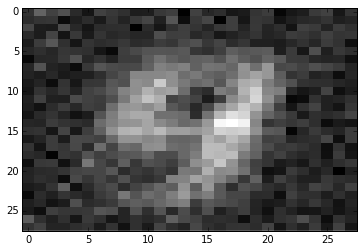

step 31000, train accuracy 0.6
step 31100, train accuracy 0.76
step 31200, train accuracy 0.6
step 31300, train accuracy 0.64
step 31400, train accuracy 0.74
step 31500, train accuracy 0.6
step 31600, train accuracy 0.66
step 31700, train accuracy 0.58
step 31800, train accuracy 0.56
step 31900, train accuracy 0.6
Reconstruction of a 8


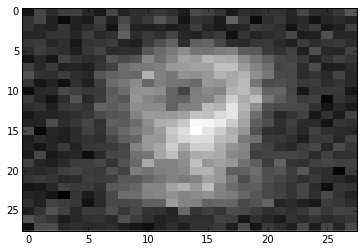

step 32000, train accuracy 0.74
step 32100, train accuracy 0.72
step 32200, train accuracy 0.7
step 32300, train accuracy 0.72
step 32400, train accuracy 0.58
step 32500, train accuracy 0.64
step 32600, train accuracy 0.68
step 32700, train accuracy 0.66
step 32800, train accuracy 0.72
step 32900, train accuracy 0.64
Reconstruction of a 9


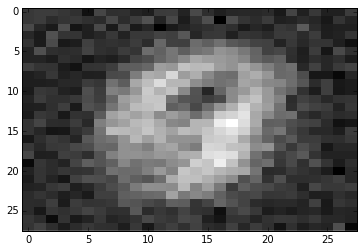

step 33000, train accuracy 0.6
step 33100, train accuracy 0.64
step 33200, train accuracy 0.58
step 33300, train accuracy 0.6
step 33400, train accuracy 0.66
step 33500, train accuracy 0.52
step 33600, train accuracy 0.66
step 33700, train accuracy 0.58
step 33800, train accuracy 0.54
step 33900, train accuracy 0.64
Reconstruction of a 2


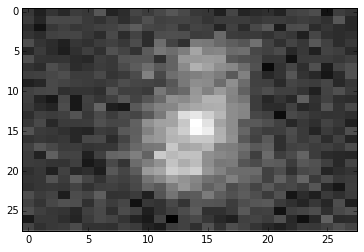

step 34000, train accuracy 0.56
step 34100, train accuracy 0.6
step 34200, train accuracy 0.56
step 34300, train accuracy 0.74
step 34400, train accuracy 0.74
step 34500, train accuracy 0.5
step 34600, train accuracy 0.66
step 34700, train accuracy 0.7
step 34800, train accuracy 0.62
step 34900, train accuracy 0.72
Reconstruction of a 7


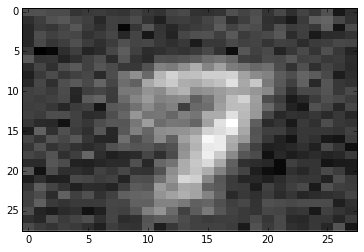

step 35000, train accuracy 0.44
step 35100, train accuracy 0.66
step 35200, train accuracy 0.62
step 35300, train accuracy 0.6
step 35400, train accuracy 0.54
step 35500, train accuracy 0.64
step 35600, train accuracy 0.62
step 35700, train accuracy 0.7
step 35800, train accuracy 0.66
step 35900, train accuracy 0.56
Reconstruction of a 3


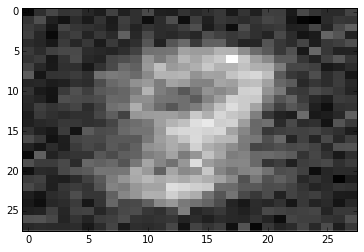

step 36000, train accuracy 0.74
step 36100, train accuracy 0.68
step 36200, train accuracy 0.58
step 36300, train accuracy 0.68
step 36400, train accuracy 0.62
step 36500, train accuracy 0.56
step 36600, train accuracy 0.56
step 36700, train accuracy 0.48
step 36800, train accuracy 0.66
step 36900, train accuracy 0.5
Reconstruction of a 9


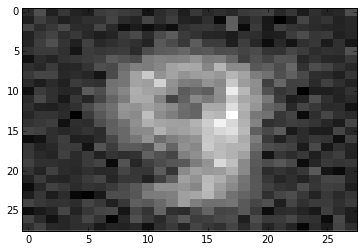

step 37000, train accuracy 0.64
step 37100, train accuracy 0.66
step 37200, train accuracy 0.64
step 37300, train accuracy 0.5
step 37400, train accuracy 0.7
step 37500, train accuracy 0.74
step 37600, train accuracy 0.78
step 37700, train accuracy 0.58
step 37800, train accuracy 0.62
step 37900, train accuracy 0.62
Reconstruction of a 3


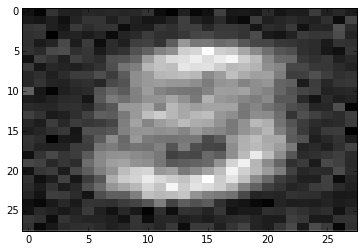

step 38000, train accuracy 0.7
step 38100, train accuracy 0.6
step 38200, train accuracy 0.6
step 38300, train accuracy 0.62
step 38400, train accuracy 0.74
step 38500, train accuracy 0.6
step 38600, train accuracy 0.66
step 38700, train accuracy 0.68
step 38800, train accuracy 0.66
step 38900, train accuracy 0.62
Reconstruction of a 1


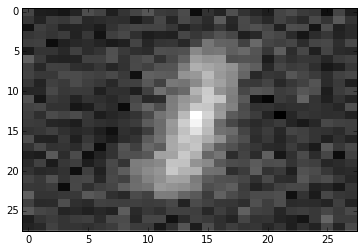

step 39000, train accuracy 0.64
step 39100, train accuracy 0.64
step 39200, train accuracy 0.46
step 39300, train accuracy 0.52
step 39400, train accuracy 0.56
step 39500, train accuracy 0.5
step 39600, train accuracy 0.7
step 39700, train accuracy 0.56
step 39800, train accuracy 0.7
step 39900, train accuracy 0.7
epoch 4, learning rate 4.64159e-06
Reconstruction of a 5


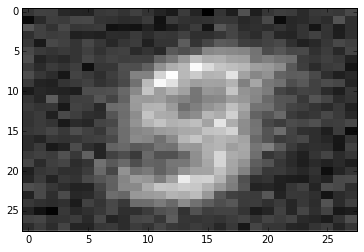

step 40000, train accuracy 0.56
step 40100, train accuracy 0.6
step 40200, train accuracy 0.64
step 40300, train accuracy 0.58
step 40400, train accuracy 0.58
step 40500, train accuracy 0.64
step 40600, train accuracy 0.54
step 40700, train accuracy 0.58
step 40800, train accuracy 0.68
step 40900, train accuracy 0.52
Reconstruction of a 4


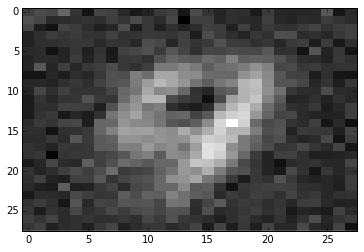

step 41000, train accuracy 0.72
step 41100, train accuracy 0.64
step 41200, train accuracy 0.6
step 41300, train accuracy 0.56
step 41400, train accuracy 0.66
step 41500, train accuracy 0.72
step 41600, train accuracy 0.62
step 41700, train accuracy 0.74
step 41800, train accuracy 0.64
step 41900, train accuracy 0.64
Reconstruction of a 1


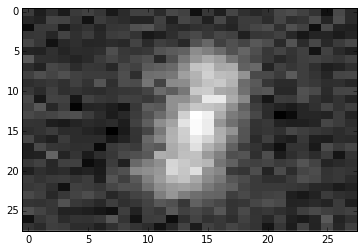

step 42000, train accuracy 0.72
step 42100, train accuracy 0.64
step 42200, train accuracy 0.74
step 42300, train accuracy 0.66
step 42400, train accuracy 0.62
step 42500, train accuracy 0.58
step 42600, train accuracy 0.64
step 42700, train accuracy 0.8
step 42800, train accuracy 0.64
step 42900, train accuracy 0.52
Reconstruction of a 2


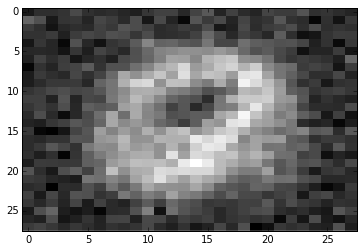

step 43000, train accuracy 0.64
step 43100, train accuracy 0.68
step 43200, train accuracy 0.66
step 43300, train accuracy 0.62
step 43400, train accuracy 0.66
step 43500, train accuracy 0.56
step 43600, train accuracy 0.62
step 43700, train accuracy 0.6
step 43800, train accuracy 0.64
step 43900, train accuracy 0.58
Reconstruction of a 8


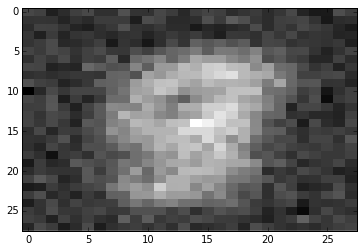

step 44000, train accuracy 0.58
step 44100, train accuracy 0.62
step 44200, train accuracy 0.6
step 44300, train accuracy 0.7
step 44400, train accuracy 0.7
step 44500, train accuracy 0.7
step 44600, train accuracy 0.74
step 44700, train accuracy 0.64
step 44800, train accuracy 0.64
step 44900, train accuracy 0.7
Reconstruction of a 3


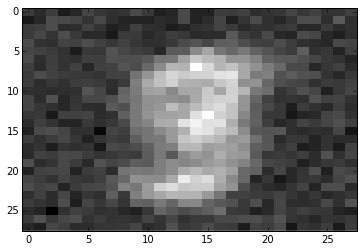

step 45000, train accuracy 0.72
step 45100, train accuracy 0.5
step 45200, train accuracy 0.58
step 45300, train accuracy 0.74
step 45400, train accuracy 0.56
step 45500, train accuracy 0.6
step 45600, train accuracy 0.54
step 45700, train accuracy 0.66
step 45800, train accuracy 0.7
step 45900, train accuracy 0.68
Reconstruction of a 9


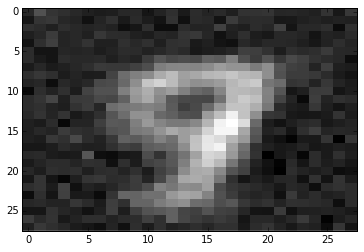

step 46000, train accuracy 0.6
step 46100, train accuracy 0.64
step 46200, train accuracy 0.68
step 46300, train accuracy 0.6
step 46400, train accuracy 0.72
step 46500, train accuracy 0.62
step 46600, train accuracy 0.62
step 46700, train accuracy 0.72
step 46800, train accuracy 0.64
step 46900, train accuracy 0.64
Reconstruction of a 3


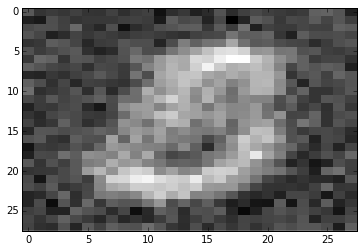

step 47000, train accuracy 0.62
step 47100, train accuracy 0.68
step 47200, train accuracy 0.68
step 47300, train accuracy 0.58
step 47400, train accuracy 0.7
step 47500, train accuracy 0.68
step 47600, train accuracy 0.68
step 47700, train accuracy 0.56
step 47800, train accuracy 0.56
step 47900, train accuracy 0.7
Reconstruction of a 4


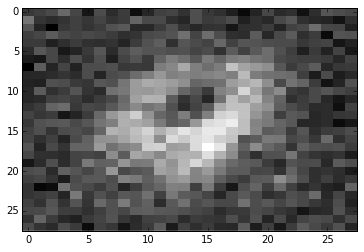

step 48000, train accuracy 0.6
step 48100, train accuracy 0.68
step 48200, train accuracy 0.68
step 48300, train accuracy 0.68
step 48400, train accuracy 0.62
step 48500, train accuracy 0.74
step 48600, train accuracy 0.76
step 48700, train accuracy 0.6
step 48800, train accuracy 0.68
step 48900, train accuracy 0.6
Reconstruction of a 9


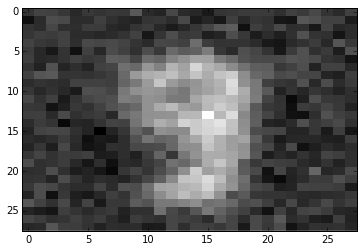

step 49000, train accuracy 0.7
step 49100, train accuracy 0.66
step 49200, train accuracy 0.72
step 49300, train accuracy 0.62
step 49400, train accuracy 0.66
step 49500, train accuracy 0.62
step 49600, train accuracy 0.68
step 49700, train accuracy 0.6
step 49800, train accuracy 0.64
step 49900, train accuracy 0.66
epoch 5, learning rate 2.15443e-06
Reconstruction of a 4


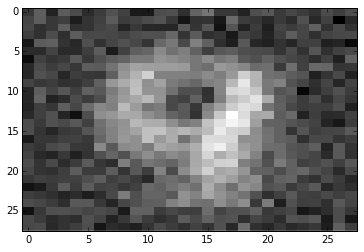

step 50000, train accuracy 0.6
step 50100, train accuracy 0.62
step 50200, train accuracy 0.68
step 50300, train accuracy 0.66
step 50400, train accuracy 0.58
step 50500, train accuracy 0.62
step 50600, train accuracy 0.66
step 50700, train accuracy 0.58
step 50800, train accuracy 0.52
step 50900, train accuracy 0.52
Reconstruction of a 2


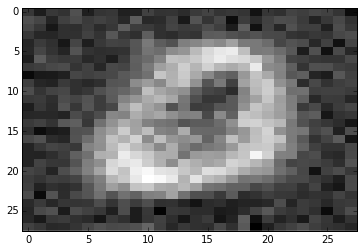

step 51000, train accuracy 0.66
step 51100, train accuracy 0.72
step 51200, train accuracy 0.62
step 51300, train accuracy 0.52
step 51400, train accuracy 0.66
step 51500, train accuracy 0.64
step 51600, train accuracy 0.56
step 51700, train accuracy 0.62
step 51800, train accuracy 0.66
step 51900, train accuracy 0.68
Reconstruction of a 5


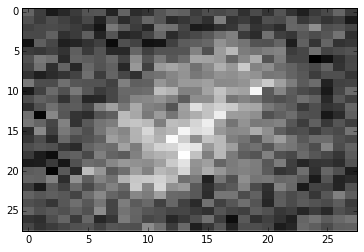

step 52000, train accuracy 0.66
step 52100, train accuracy 0.6
step 52200, train accuracy 0.66
step 52300, train accuracy 0.54
step 52400, train accuracy 0.6
step 52500, train accuracy 0.62
step 52600, train accuracy 0.62
step 52700, train accuracy 0.58
step 52800, train accuracy 0.68
step 52900, train accuracy 0.56
Reconstruction of a 1


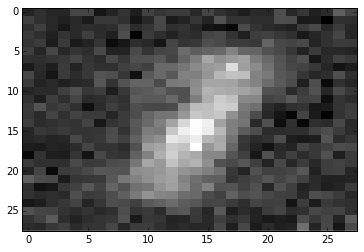

step 53000, train accuracy 0.8
step 53100, train accuracy 0.58
step 53200, train accuracy 0.6
step 53300, train accuracy 0.54
step 53400, train accuracy 0.56
step 53500, train accuracy 0.68
step 53600, train accuracy 0.82
step 53700, train accuracy 0.62
step 53800, train accuracy 0.68
step 53900, train accuracy 0.54
Reconstruction of a 7


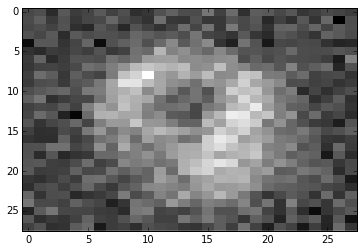

step 54000, train accuracy 0.66
step 54100, train accuracy 0.56
step 54200, train accuracy 0.7
step 54300, train accuracy 0.56
step 54400, train accuracy 0.58
step 54500, train accuracy 0.62
step 54600, train accuracy 0.62
step 54700, train accuracy 0.68
step 54800, train accuracy 0.54
step 54900, train accuracy 0.66
Reconstruction of a 1


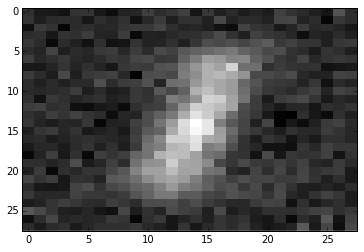

step 55000, train accuracy 0.64
step 55100, train accuracy 0.78
step 55200, train accuracy 0.56
step 55300, train accuracy 0.58
step 55400, train accuracy 0.58
step 55500, train accuracy 0.62
step 55600, train accuracy 0.68
step 55700, train accuracy 0.52
step 55800, train accuracy 0.72
step 55900, train accuracy 0.74
Reconstruction of a 5


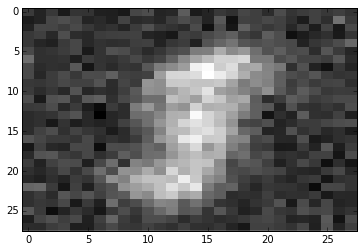

step 56000, train accuracy 0.76
step 56100, train accuracy 0.72
step 56200, train accuracy 0.64
step 56300, train accuracy 0.68
step 56400, train accuracy 0.58
step 56500, train accuracy 0.68
step 56600, train accuracy 0.56
step 56700, train accuracy 0.66
step 56800, train accuracy 0.68
step 56900, train accuracy 0.6
Reconstruction of a 9


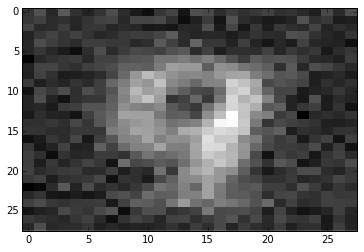

step 57000, train accuracy 0.68
step 57100, train accuracy 0.66
step 57200, train accuracy 0.64
step 57300, train accuracy 0.64
step 57400, train accuracy 0.56
step 57500, train accuracy 0.64
step 57600, train accuracy 0.68
step 57700, train accuracy 0.52
step 57800, train accuracy 0.66
step 57900, train accuracy 0.62
Reconstruction of a 8


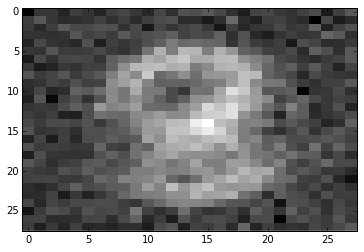

step 58000, train accuracy 0.64
step 58100, train accuracy 0.66
step 58200, train accuracy 0.7
step 58300, train accuracy 0.62
step 58400, train accuracy 0.68
step 58500, train accuracy 0.62
step 58600, train accuracy 0.64
step 58700, train accuracy 0.56
step 58800, train accuracy 0.7
step 58900, train accuracy 0.72
Reconstruction of a 3


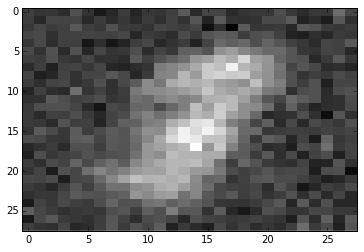

step 59000, train accuracy 0.64
step 59100, train accuracy 0.74
step 59200, train accuracy 0.7
step 59300, train accuracy 0.6
step 59400, train accuracy 0.64
step 59500, train accuracy 0.62
step 59600, train accuracy 0.64
step 59700, train accuracy 0.7
step 59800, train accuracy 0.68
step 59900, train accuracy 0.56
epoch 6, learning rate 1e-06
Reconstruction of a 5


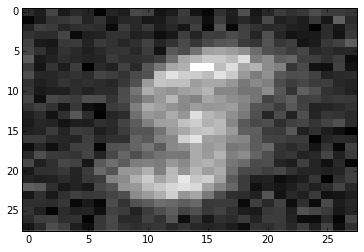

step 60000, train accuracy 0.56
step 60100, train accuracy 0.54
step 60200, train accuracy 0.64
step 60300, train accuracy 0.72
step 60400, train accuracy 0.7
step 60500, train accuracy 0.64
step 60600, train accuracy 0.72
step 60700, train accuracy 0.52
step 60800, train accuracy 0.74
step 60900, train accuracy 0.72
Reconstruction of a 1


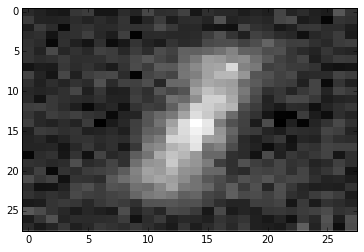

step 61000, train accuracy 0.58
step 61100, train accuracy 0.62
step 61200, train accuracy 0.62
step 61300, train accuracy 0.7
step 61400, train accuracy 0.58
step 61500, train accuracy 0.64
step 61600, train accuracy 0.56
step 61700, train accuracy 0.56
step 61800, train accuracy 0.64
step 61900, train accuracy 0.6
Reconstruction of a 4


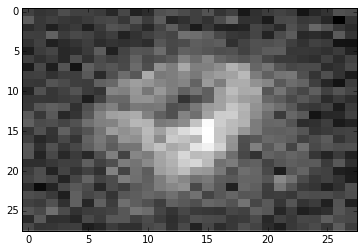

step 62000, train accuracy 0.74
step 62100, train accuracy 0.56
step 62200, train accuracy 0.64
step 62300, train accuracy 0.62
step 62400, train accuracy 0.66
step 62500, train accuracy 0.6
step 62600, train accuracy 0.58
step 62700, train accuracy 0.68
step 62800, train accuracy 0.7
step 62900, train accuracy 0.62
Reconstruction of a 7


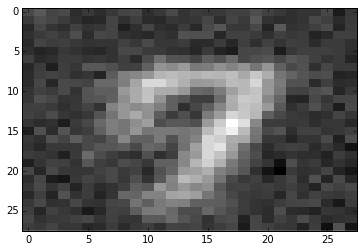

step 63000, train accuracy 0.68
step 63100, train accuracy 0.66
step 63200, train accuracy 0.66
step 63300, train accuracy 0.72
step 63400, train accuracy 0.64
step 63500, train accuracy 0.76
step 63600, train accuracy 0.48
step 63700, train accuracy 0.64
step 63800, train accuracy 0.62
step 63900, train accuracy 0.64
Reconstruction of a 0


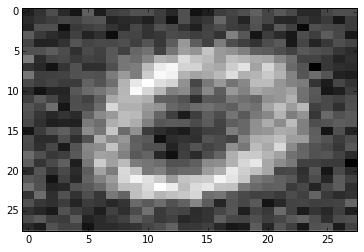

step 64000, train accuracy 0.44
step 64100, train accuracy 0.58
step 64200, train accuracy 0.58
step 64300, train accuracy 0.58
step 64400, train accuracy 0.56
step 64500, train accuracy 0.7
step 64600, train accuracy 0.72
step 64700, train accuracy 0.64
step 64800, train accuracy 0.74
step 64900, train accuracy 0.56
Reconstruction of a 0


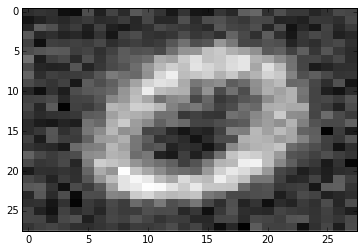

step 65000, train accuracy 0.68
step 65100, train accuracy 0.68
step 65200, train accuracy 0.66
step 65300, train accuracy 0.58
step 65400, train accuracy 0.64
step 65500, train accuracy 0.68
step 65600, train accuracy 0.56
step 65700, train accuracy 0.7
step 65800, train accuracy 0.58
step 65900, train accuracy 0.6
Reconstruction of a 0


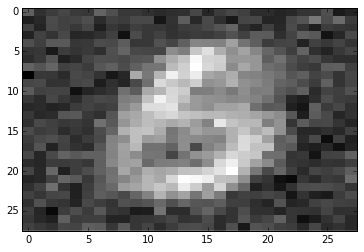

step 66000, train accuracy 0.58
step 66100, train accuracy 0.72
step 66200, train accuracy 0.68
step 66300, train accuracy 0.68
step 66400, train accuracy 0.64
step 66500, train accuracy 0.64
step 66600, train accuracy 0.6
step 66700, train accuracy 0.62
step 66800, train accuracy 0.68
step 66900, train accuracy 0.56
Reconstruction of a 8


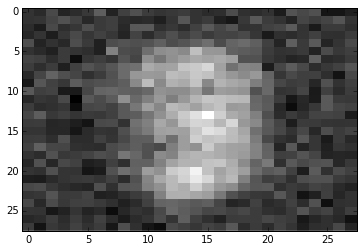

step 67000, train accuracy 0.64
step 67100, train accuracy 0.58
step 67200, train accuracy 0.6
step 67300, train accuracy 0.54
step 67400, train accuracy 0.64
step 67500, train accuracy 0.5
step 67600, train accuracy 0.52
step 67700, train accuracy 0.68
step 67800, train accuracy 0.64
step 67900, train accuracy 0.64
Reconstruction of a 6


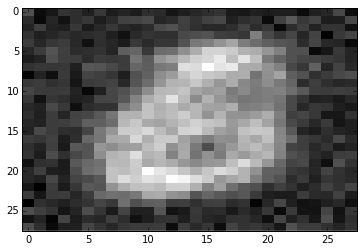

step 68000, train accuracy 0.66
step 68100, train accuracy 0.6
step 68200, train accuracy 0.68
step 68300, train accuracy 0.6
step 68400, train accuracy 0.6
step 68500, train accuracy 0.76
step 68600, train accuracy 0.58
step 68700, train accuracy 0.64
step 68800, train accuracy 0.66
step 68900, train accuracy 0.64
Reconstruction of a 9


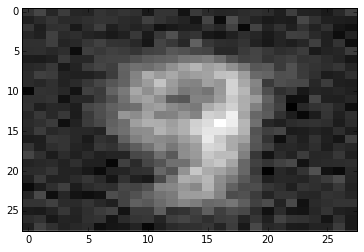

step 69000, train accuracy 0.6
step 69100, train accuracy 0.7
step 69200, train accuracy 0.62
step 69300, train accuracy 0.58
step 69400, train accuracy 0.6
step 69500, train accuracy 0.72
step 69600, train accuracy 0.68
step 69700, train accuracy 0.64
step 69800, train accuracy 0.72
step 69900, train accuracy 0.7
epoch 7, learning rate 4.64159e-07
Reconstruction of a 7


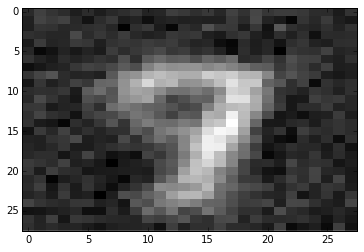

step 70000, train accuracy 0.68
step 70100, train accuracy 0.6
step 70200, train accuracy 0.6
step 70300, train accuracy 0.6
step 70400, train accuracy 0.6
step 70500, train accuracy 0.7
step 70600, train accuracy 0.6
step 70700, train accuracy 0.72
step 70800, train accuracy 0.76
step 70900, train accuracy 0.58
Reconstruction of a 8


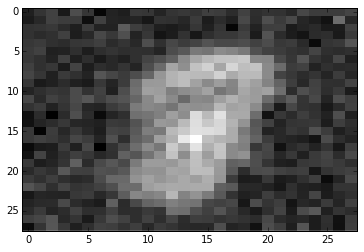

step 71000, train accuracy 0.66
step 71100, train accuracy 0.72
step 71200, train accuracy 0.66
step 71300, train accuracy 0.58
step 71400, train accuracy 0.56
step 71500, train accuracy 0.72
step 71600, train accuracy 0.64
step 71700, train accuracy 0.62
step 71800, train accuracy 0.66
step 71900, train accuracy 0.56
Reconstruction of a 0


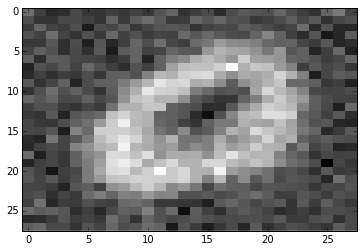

step 72000, train accuracy 0.78
step 72100, train accuracy 0.78
step 72200, train accuracy 0.44
step 72300, train accuracy 0.78
step 72400, train accuracy 0.46
step 72500, train accuracy 0.76
step 72600, train accuracy 0.6
step 72700, train accuracy 0.7
step 72800, train accuracy 0.64
step 72900, train accuracy 0.66
Reconstruction of a 5


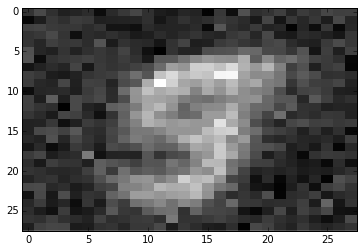

step 73000, train accuracy 0.64
step 73100, train accuracy 0.58
step 73200, train accuracy 0.56
step 73300, train accuracy 0.66
step 73400, train accuracy 0.56
step 73500, train accuracy 0.66
step 73600, train accuracy 0.64
step 73700, train accuracy 0.66
step 73800, train accuracy 0.66
step 73900, train accuracy 0.64
Reconstruction of a 3


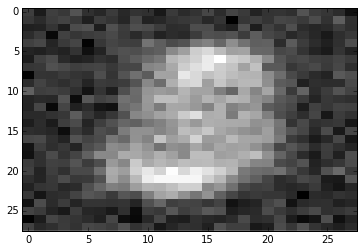

step 74000, train accuracy 0.64
step 74100, train accuracy 0.66
step 74200, train accuracy 0.6
step 74300, train accuracy 0.54
step 74400, train accuracy 0.74
step 74500, train accuracy 0.62
step 74600, train accuracy 0.66
step 74700, train accuracy 0.54
step 74800, train accuracy 0.66
step 74900, train accuracy 0.72
Reconstruction of a 6


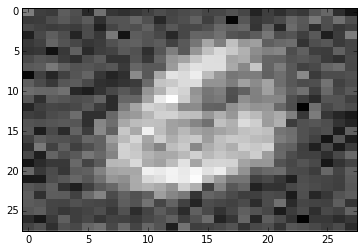

step 75000, train accuracy 0.7
step 75100, train accuracy 0.56
step 75200, train accuracy 0.64
step 75300, train accuracy 0.64
step 75400, train accuracy 0.7
step 75500, train accuracy 0.56
step 75600, train accuracy 0.54
step 75700, train accuracy 0.64
step 75800, train accuracy 0.64
step 75900, train accuracy 0.56
Reconstruction of a 8


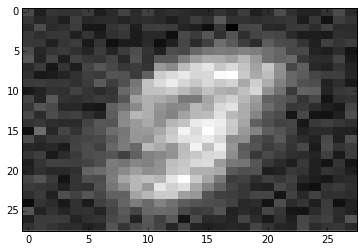

step 76000, train accuracy 0.74
step 76100, train accuracy 0.64
step 76200, train accuracy 0.8
step 76300, train accuracy 0.52
step 76400, train accuracy 0.66
step 76500, train accuracy 0.74
step 76600, train accuracy 0.6
step 76700, train accuracy 0.7
step 76800, train accuracy 0.64
step 76900, train accuracy 0.68
Reconstruction of a 1


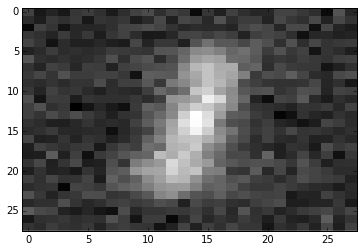

step 77000, train accuracy 0.62
step 77100, train accuracy 0.72
step 77200, train accuracy 0.6
step 77300, train accuracy 0.66
step 77400, train accuracy 0.78
step 77500, train accuracy 0.62
step 77600, train accuracy 0.66
step 77700, train accuracy 0.62
step 77800, train accuracy 0.76
step 77900, train accuracy 0.62
Reconstruction of a 0


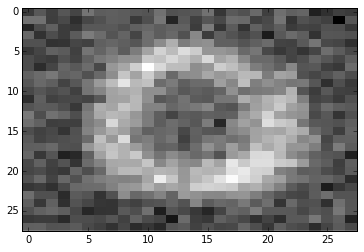

step 78000, train accuracy 0.66
step 78100, train accuracy 0.64
step 78200, train accuracy 0.58
step 78300, train accuracy 0.54
step 78400, train accuracy 0.74
step 78500, train accuracy 0.5
step 78600, train accuracy 0.54
step 78700, train accuracy 0.52
step 78800, train accuracy 0.64
step 78900, train accuracy 0.64
Reconstruction of a 5


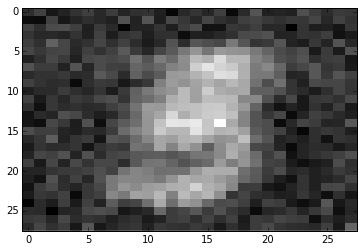

step 79000, train accuracy 0.7
step 79100, train accuracy 0.6
step 79200, train accuracy 0.66
step 79300, train accuracy 0.62
step 79400, train accuracy 0.62
step 79500, train accuracy 0.78
step 79600, train accuracy 0.7
step 79700, train accuracy 0.56
step 79800, train accuracy 0.54
step 79900, train accuracy 0.56
epoch 8, learning rate 2.15443e-07
Reconstruction of a 2


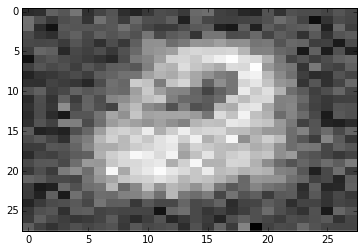

step 80000, train accuracy 0.52
step 80100, train accuracy 0.6
step 80200, train accuracy 0.68
step 80300, train accuracy 0.7
step 80400, train accuracy 0.6
step 80500, train accuracy 0.56
step 80600, train accuracy 0.76
step 80700, train accuracy 0.6
step 80800, train accuracy 0.58
step 80900, train accuracy 0.62
Reconstruction of a 1


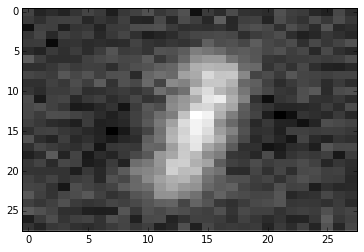

step 81000, train accuracy 0.54
step 81100, train accuracy 0.62
step 81200, train accuracy 0.54
step 81300, train accuracy 0.48
step 81400, train accuracy 0.72
step 81500, train accuracy 0.62
step 81600, train accuracy 0.64
step 81700, train accuracy 0.58
step 81800, train accuracy 0.62
step 81900, train accuracy 0.72
Reconstruction of a 3


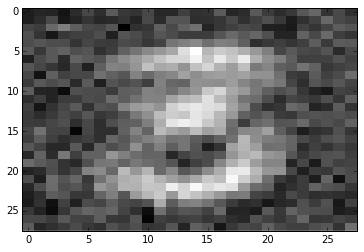

step 82000, train accuracy 0.64
step 82100, train accuracy 0.66
step 82200, train accuracy 0.64
step 82300, train accuracy 0.56
step 82400, train accuracy 0.72
step 82500, train accuracy 0.64
step 82600, train accuracy 0.6
step 82700, train accuracy 0.6
step 82800, train accuracy 0.48
step 82900, train accuracy 0.66
Reconstruction of a 1


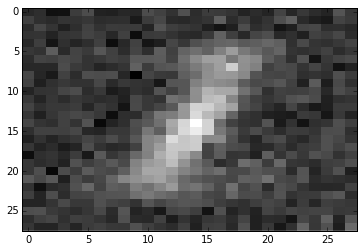

step 83000, train accuracy 0.52
step 83100, train accuracy 0.64
step 83200, train accuracy 0.82
step 83300, train accuracy 0.54
step 83400, train accuracy 0.6
step 83500, train accuracy 0.56
step 83600, train accuracy 0.66
step 83700, train accuracy 0.58
step 83800, train accuracy 0.64
step 83900, train accuracy 0.64
Reconstruction of a 8


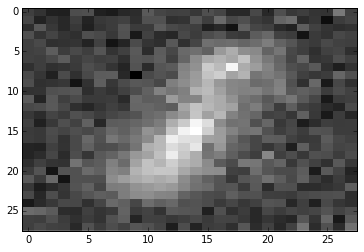

step 84000, train accuracy 0.68
step 84100, train accuracy 0.66
step 84200, train accuracy 0.62
step 84300, train accuracy 0.66
step 84400, train accuracy 0.62
step 84500, train accuracy 0.58
step 84600, train accuracy 0.68
step 84700, train accuracy 0.62
step 84800, train accuracy 0.66
step 84900, train accuracy 0.6
Reconstruction of a 9


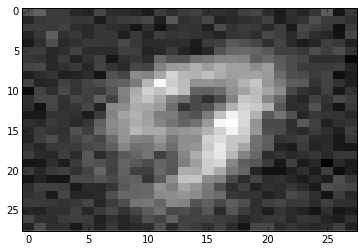

step 85000, train accuracy 0.7
step 85100, train accuracy 0.6
step 85200, train accuracy 0.66
step 85300, train accuracy 0.64
step 85400, train accuracy 0.6
step 85500, train accuracy 0.62
step 85600, train accuracy 0.54
step 85700, train accuracy 0.54
step 85800, train accuracy 0.56
step 85900, train accuracy 0.56
Reconstruction of a 5


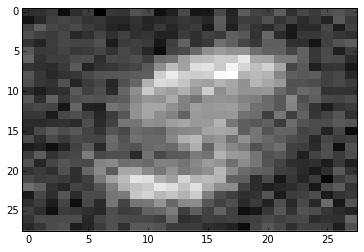

step 86000, train accuracy 0.6
step 86100, train accuracy 0.7
step 86200, train accuracy 0.6
step 86300, train accuracy 0.58
step 86400, train accuracy 0.56
step 86500, train accuracy 0.7
step 86600, train accuracy 0.74
step 86700, train accuracy 0.58
step 86800, train accuracy 0.8
step 86900, train accuracy 0.7
Reconstruction of a 5


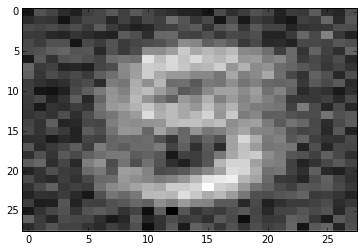

step 87000, train accuracy 0.7
step 87100, train accuracy 0.68
step 87200, train accuracy 0.64
step 87300, train accuracy 0.6
step 87400, train accuracy 0.58
step 87500, train accuracy 0.6
step 87600, train accuracy 0.44
step 87700, train accuracy 0.6
step 87800, train accuracy 0.6
step 87900, train accuracy 0.6
Reconstruction of a 8


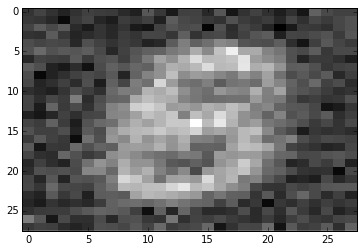

step 88000, train accuracy 0.58
step 88100, train accuracy 0.78
step 88200, train accuracy 0.5
step 88300, train accuracy 0.56
step 88400, train accuracy 0.66
step 88500, train accuracy 0.66
step 88600, train accuracy 0.72
step 88700, train accuracy 0.6
step 88800, train accuracy 0.8
step 88900, train accuracy 0.68
Reconstruction of a 3


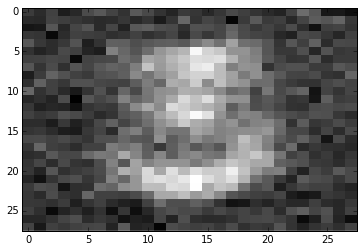

step 89000, train accuracy 0.52
step 89100, train accuracy 0.64
step 89200, train accuracy 0.72
step 89300, train accuracy 0.62
step 89400, train accuracy 0.8
step 89500, train accuracy 0.68
step 89600, train accuracy 0.56
step 89700, train accuracy 0.58
step 89800, train accuracy 0.6
step 89900, train accuracy 0.74
epoch 9, learning rate 1e-07
Reconstruction of a 9


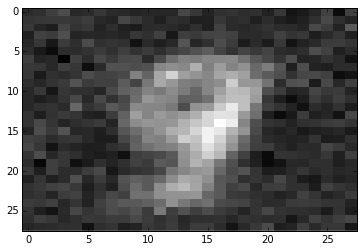

step 90000, train accuracy 0.7
step 90100, train accuracy 0.62
step 90200, train accuracy 0.72
step 90300, train accuracy 0.58
step 90400, train accuracy 0.52
step 90500, train accuracy 0.62
step 90600, train accuracy 0.64
step 90700, train accuracy 0.76
step 90800, train accuracy 0.64
step 90900, train accuracy 0.66
Reconstruction of a 5


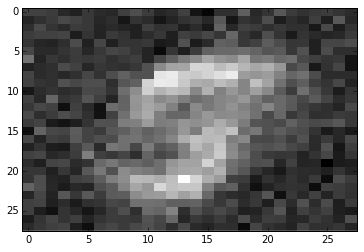

step 91000, train accuracy 0.64
step 91100, train accuracy 0.64
step 91200, train accuracy 0.6
step 91300, train accuracy 0.64
step 91400, train accuracy 0.7
step 91500, train accuracy 0.58
step 91600, train accuracy 0.66
step 91700, train accuracy 0.56
step 91800, train accuracy 0.78
step 91900, train accuracy 0.58
Reconstruction of a 3


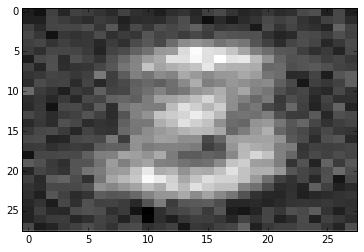

step 92000, train accuracy 0.6
step 92100, train accuracy 0.66
step 92200, train accuracy 0.62
step 92300, train accuracy 0.76
step 92400, train accuracy 0.76
step 92500, train accuracy 0.6
step 92600, train accuracy 0.64
step 92700, train accuracy 0.52
step 92800, train accuracy 0.66
step 92900, train accuracy 0.66
Reconstruction of a 1


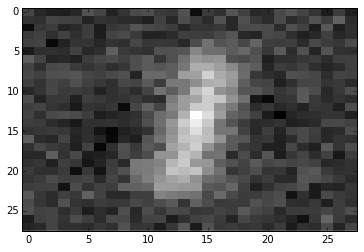

step 93000, train accuracy 0.72
step 93100, train accuracy 0.62
step 93200, train accuracy 0.66
step 93300, train accuracy 0.7
step 93400, train accuracy 0.62
step 93500, train accuracy 0.62
step 93600, train accuracy 0.58
step 93700, train accuracy 0.64
step 93800, train accuracy 0.58
step 93900, train accuracy 0.64
Reconstruction of a 3


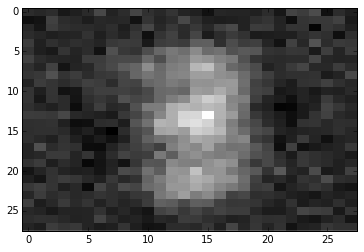

step 94000, train accuracy 0.58
step 94100, train accuracy 0.56
step 94200, train accuracy 0.74
step 94300, train accuracy 0.62
step 94400, train accuracy 0.64
step 94500, train accuracy 0.74
step 94600, train accuracy 0.54
step 94700, train accuracy 0.62
step 94800, train accuracy 0.64
step 94900, train accuracy 0.62
Reconstruction of a 7


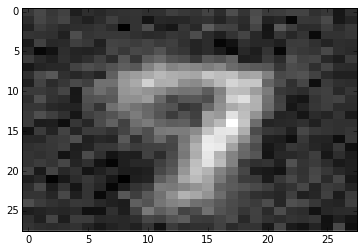

step 95000, train accuracy 0.64
step 95100, train accuracy 0.76
step 95200, train accuracy 0.66
step 95300, train accuracy 0.5
step 95400, train accuracy 0.6
step 95500, train accuracy 0.62
step 95600, train accuracy 0.58
step 95700, train accuracy 0.6
step 95800, train accuracy 0.72
step 95900, train accuracy 0.64
Reconstruction of a 8


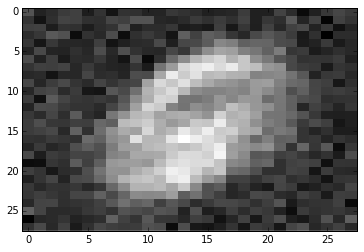

step 96000, train accuracy 0.62
step 96100, train accuracy 0.58
step 96200, train accuracy 0.62
step 96300, train accuracy 0.66
step 96400, train accuracy 0.6
step 96500, train accuracy 0.68
step 96600, train accuracy 0.68
step 96700, train accuracy 0.76
step 96800, train accuracy 0.56
step 96900, train accuracy 0.66
Reconstruction of a 9


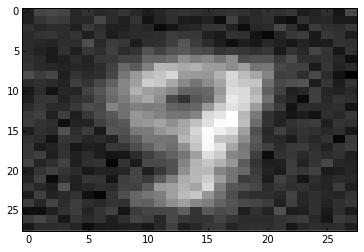

step 97000, train accuracy 0.7
step 97100, train accuracy 0.62
step 97200, train accuracy 0.64
step 97300, train accuracy 0.64
step 97400, train accuracy 0.76
step 97500, train accuracy 0.74
step 97600, train accuracy 0.58
step 97700, train accuracy 0.58
step 97800, train accuracy 0.66
step 97900, train accuracy 0.76
Reconstruction of a 8


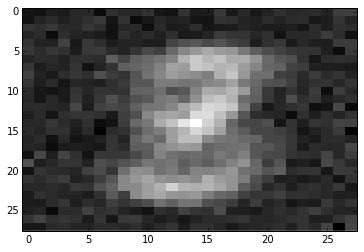

step 98000, train accuracy 0.6
step 98100, train accuracy 0.58
step 98200, train accuracy 0.54
step 98300, train accuracy 0.72
step 98400, train accuracy 0.56
step 98500, train accuracy 0.64
step 98600, train accuracy 0.72
step 98700, train accuracy 0.68
step 98800, train accuracy 0.64
step 98900, train accuracy 0.58
Reconstruction of a 2


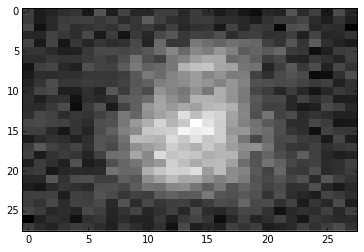

step 99000, train accuracy 0.68
step 99100, train accuracy 0.72
step 99200, train accuracy 0.66
step 99300, train accuracy 0.64
step 99400, train accuracy 0.62
step 99500, train accuracy 0.76
step 99600, train accuracy 0.64
step 99700, train accuracy 0.58
step 99800, train accuracy 0.56
step 99900, train accuracy 0.66
test accuracy 0.6402


In [5]:
with tf.Graph().as_default(): 
  with tf.name_scope('common'):
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    # x_r = tf.placeholder(tf.float32, shape=[None, 784])
    learning_rate = tf.placeholder(tf.float32, shape=[])

    W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_2 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
    b_2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_3 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
    b_3 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_4 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
    b_4 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

    a = tf.nn.relu(tf.matmul(x, W) + b)
    a_2 = tf.nn.relu(tf.matmul(a, W_2) + b_2)
    a_3 = tf.nn.relu(tf.matmul(a_2, W_3) + b_3)
    y = tf.nn.sigmoid(tf.matmul(a_3, W_4) + b_4)

  with tf.name_scope('backwards'):
    a_2_r = tf.nn.relu(tf.matmul(a_3 - b_3, tf.transpose(W_3)))
    a_r = tf.nn.relu(tf.matmul(a_2_r - b_2, tf.transpose(W_2)))
    x_r = tf.matmul(a_r - b, tf.transpose(W))

  global_step = tf.Variable(0, name='global_step', trainable=False)

  # losses
  cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), 
                                              reduction_indices=[1]),
                              name='xentropy_mean')
  tf.scalar_summary(cross_entropy.op.name, cross_entropy)

  reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]),
                                      name='reconstruction_l2_mean_error')
  tf.scalar_summary(reconstruction_error.op.name, reconstruction_error)

  # training
  # train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy, 
                                                            global_step=global_step)
  back_train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(reconstruction_error)

  # evaluation
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  ########## INIT AND SUMMARY HAVE TO APPEAR HERE AT THE END TO BE PROPERLY DEFINED
  # misc
  init = tf.initialize_all_variables()
  summary_op = tf.merge_all_summaries()

  with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.train.SummaryWriter('./mnist_relu_3hl/recons_grad', sess.graph)

    num_epochs = 10
    steps_per_epoch = 10000
    for epoch in range(num_epochs):
      l_r = 10**np.linspace(-4,-7,num_epochs)[epoch]
      print("epoch %d, learning rate %g"%(epoch,l_r))

      for step in range(steps_per_epoch):
        batch = mnist.train.next_batch(50)
        feed_dict = {x: batch[0], y_: batch[1], learning_rate: l_r}

        if step%1000 == 0:
          reconstruction = x_r.eval(feed_dict=feed_dict)
          print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
          plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
          plt.show()

        if step%100 == 0:
          train_accuracy = accuracy.eval(feed_dict=feed_dict)
          print("step %d, train accuracy %g"%(step + epoch*steps_per_epoch, train_accuracy))
          summary_str = sess.run(summary_op, feed_dict=feed_dict)
          summary_writer.add_summary(summary_str, step + epoch*steps_per_epoch)
          summary_writer.flush()

        train_step.run(feed_dict=feed_dict)
        back_train_step.run(feed_dict=feed_dict)

    print("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))

epoch 0, learning rate 0.0001
Reconstruction of a 6


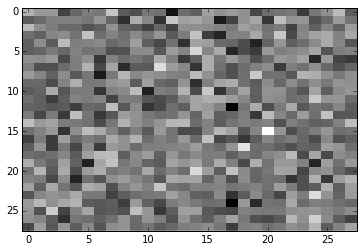

step 0, train accuracy 0.16
step 100, train accuracy 0.18
step 200, train accuracy 0.1
step 300, train accuracy 0.16
step 400, train accuracy 0.16
step 500, train accuracy 0.14
step 600, train accuracy 0.08
step 700, train accuracy 0.08
step 800, train accuracy 0.16
step 900, train accuracy 0.24
Reconstruction of a 0


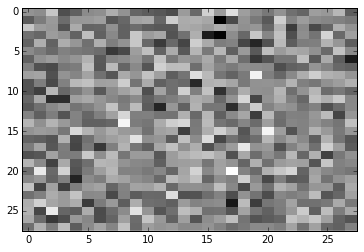

step 1000, train accuracy 0.16
step 1100, train accuracy 0.12
step 1200, train accuracy 0.18
step 1300, train accuracy 0.14
step 1400, train accuracy 0.12
step 1500, train accuracy 0.04
step 1600, train accuracy 0.16
step 1700, train accuracy 0.1
step 1800, train accuracy 0.08
step 1900, train accuracy 0.12
Reconstruction of a 1


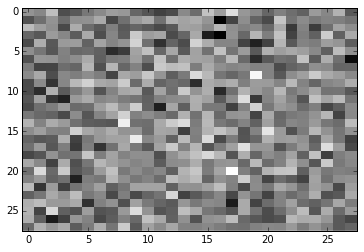

step 2000, train accuracy 0.16
step 2100, train accuracy 0.12
step 2200, train accuracy 0.12
step 2300, train accuracy 0.1
step 2400, train accuracy 0.1
step 2500, train accuracy 0.2
step 2600, train accuracy 0.04
step 2700, train accuracy 0.14
step 2800, train accuracy 0.08
step 2900, train accuracy 0.12
Reconstruction of a 4


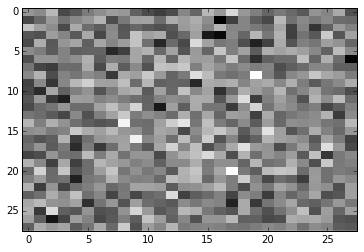

step 3000, train accuracy 0.1
step 3100, train accuracy 0.12
step 3200, train accuracy 0.12
step 3300, train accuracy 0.12
step 3400, train accuracy 0.12
step 3500, train accuracy 0.12
step 3600, train accuracy 0.1
step 3700, train accuracy 0.18
step 3800, train accuracy 0.1
step 3900, train accuracy 0.14
Reconstruction of a 9


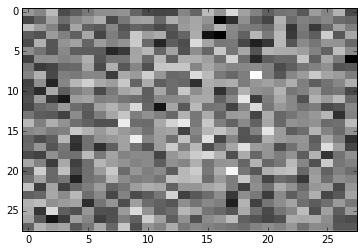

step 4000, train accuracy 0.1
step 4100, train accuracy 0.1
step 4200, train accuracy 0.12
step 4300, train accuracy 0.12
step 4400, train accuracy 0.1
step 4500, train accuracy 0.14
step 4600, train accuracy 0.12
step 4700, train accuracy 0.06
step 4800, train accuracy 0.1
step 4900, train accuracy 0.18
Reconstruction of a 5


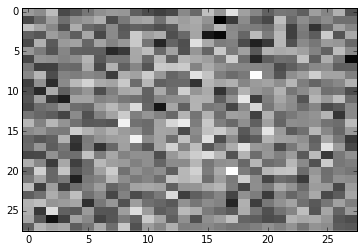

step 5000, train accuracy 0.06
step 5100, train accuracy 0.1
step 5200, train accuracy 0.16
step 5300, train accuracy 0.14
step 5400, train accuracy 0.18
step 5500, train accuracy 0.16
step 5600, train accuracy 0.08
step 5700, train accuracy 0.12
step 5800, train accuracy 0.18
step 5900, train accuracy 0.14
Reconstruction of a 0


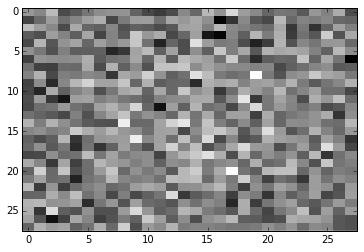

step 6000, train accuracy 0.14
step 6100, train accuracy 0.22
step 6200, train accuracy 0.18
step 6300, train accuracy 0.22
step 6400, train accuracy 0.16
step 6500, train accuracy 0.26
step 6600, train accuracy 0.12
step 6700, train accuracy 0.16
step 6800, train accuracy 0.14
step 6900, train accuracy 0.18
Reconstruction of a 7


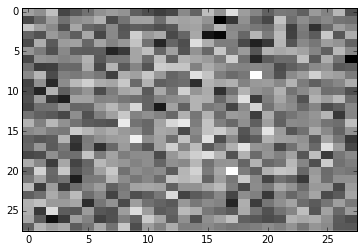

step 7000, train accuracy 0.32
step 7100, train accuracy 0.2
step 7200, train accuracy 0.22
step 7300, train accuracy 0.22
step 7400, train accuracy 0.2
step 7500, train accuracy 0.1
step 7600, train accuracy 0.2
step 7700, train accuracy 0.1
step 7800, train accuracy 0.26
step 7900, train accuracy 0.22
Reconstruction of a 8


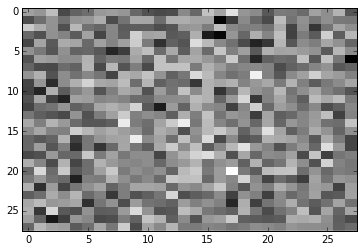

step 8000, train accuracy 0.08
step 8100, train accuracy 0.2
step 8200, train accuracy 0.2
step 8300, train accuracy 0.24
step 8400, train accuracy 0.18
step 8500, train accuracy 0.3
step 8600, train accuracy 0.2
step 8700, train accuracy 0.28
step 8800, train accuracy 0.32
step 8900, train accuracy 0.2
Reconstruction of a 8


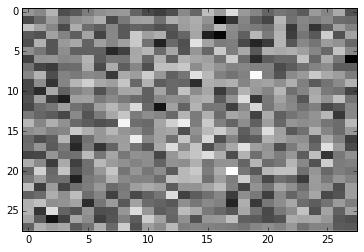

step 9000, train accuracy 0.26
step 9100, train accuracy 0.22
step 9200, train accuracy 0.32
step 9300, train accuracy 0.34
step 9400, train accuracy 0.4
step 9500, train accuracy 0.32
step 9600, train accuracy 0.3
step 9700, train accuracy 0.22
step 9800, train accuracy 0.18
step 9900, train accuracy 0.24
epoch 1, learning rate 4.64159e-05
Reconstruction of a 8


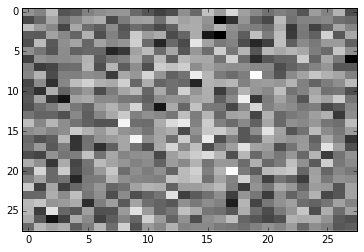

step 10000, train accuracy 0.26
step 10100, train accuracy 0.18
step 10200, train accuracy 0.36
step 10300, train accuracy 0.14
step 10400, train accuracy 0.2
step 10500, train accuracy 0.28
step 10600, train accuracy 0.48
step 10700, train accuracy 0.22
step 10800, train accuracy 0.14
step 10900, train accuracy 0.16
Reconstruction of a 5


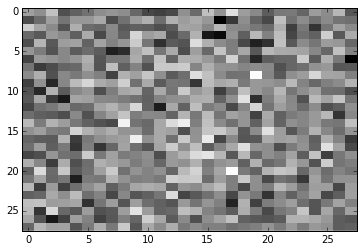

step 11000, train accuracy 0.3
step 11100, train accuracy 0.26
step 11200, train accuracy 0.26
step 11300, train accuracy 0.22
step 11400, train accuracy 0.4
step 11500, train accuracy 0.34
step 11600, train accuracy 0.34
step 11700, train accuracy 0.36
step 11800, train accuracy 0.34
step 11900, train accuracy 0.36
Reconstruction of a 8


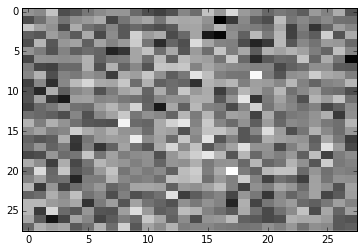

step 12000, train accuracy 0.3
step 12100, train accuracy 0.44
step 12200, train accuracy 0.26
step 12300, train accuracy 0.32
step 12400, train accuracy 0.24
step 12500, train accuracy 0.3
step 12600, train accuracy 0.44
step 12700, train accuracy 0.32
step 12800, train accuracy 0.26
step 12900, train accuracy 0.28
Reconstruction of a 3


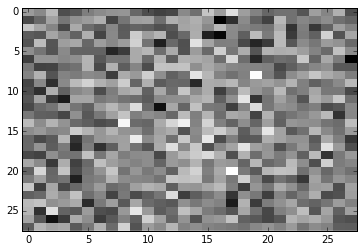

step 13000, train accuracy 0.34
step 13100, train accuracy 0.46
step 13200, train accuracy 0.3
step 13300, train accuracy 0.3
step 13400, train accuracy 0.36
step 13500, train accuracy 0.3
step 13600, train accuracy 0.26
step 13700, train accuracy 0.32
step 13800, train accuracy 0.36
step 13900, train accuracy 0.28
Reconstruction of a 7


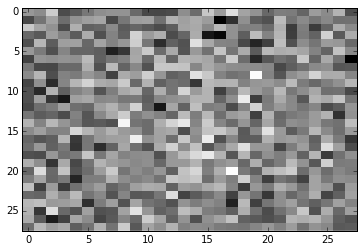

step 14000, train accuracy 0.46
step 14100, train accuracy 0.28
step 14200, train accuracy 0.3
step 14300, train accuracy 0.46
step 14400, train accuracy 0.26
step 14500, train accuracy 0.26
step 14600, train accuracy 0.24
step 14700, train accuracy 0.3
step 14800, train accuracy 0.44
step 14900, train accuracy 0.38
Reconstruction of a 2


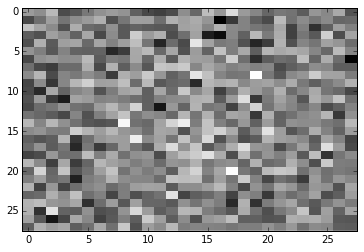

step 15000, train accuracy 0.4
step 15100, train accuracy 0.3
step 15200, train accuracy 0.24
step 15300, train accuracy 0.38
step 15400, train accuracy 0.34
step 15500, train accuracy 0.36
step 15600, train accuracy 0.44
step 15700, train accuracy 0.34
step 15800, train accuracy 0.44
step 15900, train accuracy 0.36
Reconstruction of a 8


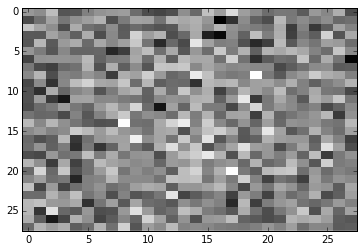

step 16000, train accuracy 0.4
step 16100, train accuracy 0.36
step 16200, train accuracy 0.32
step 16300, train accuracy 0.3
step 16400, train accuracy 0.4
step 16500, train accuracy 0.34
step 16600, train accuracy 0.3
step 16700, train accuracy 0.48
step 16800, train accuracy 0.32
step 16900, train accuracy 0.42
Reconstruction of a 0


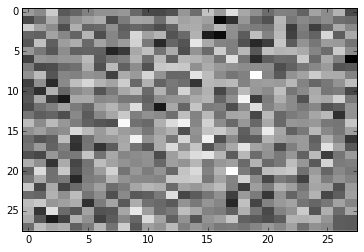

step 17000, train accuracy 0.38
step 17100, train accuracy 0.3
step 17200, train accuracy 0.34
step 17300, train accuracy 0.34
step 17400, train accuracy 0.34
step 17500, train accuracy 0.4
step 17600, train accuracy 0.38
step 17700, train accuracy 0.26
step 17800, train accuracy 0.46
step 17900, train accuracy 0.32
Reconstruction of a 9


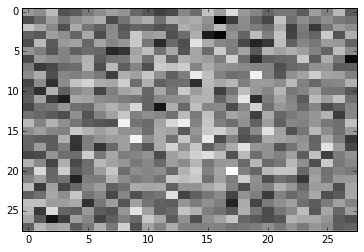

step 18000, train accuracy 0.38
step 18100, train accuracy 0.38
step 18200, train accuracy 0.32
step 18300, train accuracy 0.32
step 18400, train accuracy 0.4
step 18500, train accuracy 0.38
step 18600, train accuracy 0.5
step 18700, train accuracy 0.42
step 18800, train accuracy 0.42
step 18900, train accuracy 0.4
Reconstruction of a 1


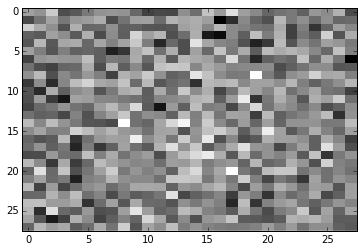

step 19000, train accuracy 0.42
step 19100, train accuracy 0.38
step 19200, train accuracy 0.38
step 19300, train accuracy 0.28
step 19400, train accuracy 0.48
step 19500, train accuracy 0.48
step 19600, train accuracy 0.5
step 19700, train accuracy 0.42
step 19800, train accuracy 0.38
step 19900, train accuracy 0.4
epoch 2, learning rate 2.15443e-05
Reconstruction of a 4


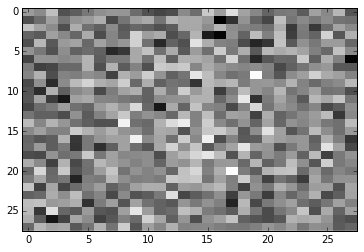

step 20000, train accuracy 0.42
step 20100, train accuracy 0.42
step 20200, train accuracy 0.42
step 20300, train accuracy 0.3
step 20400, train accuracy 0.28
step 20500, train accuracy 0.32
step 20600, train accuracy 0.36
step 20700, train accuracy 0.42
step 20800, train accuracy 0.48
step 20900, train accuracy 0.5
Reconstruction of a 5


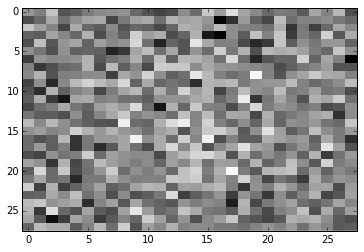

step 21000, train accuracy 0.4
step 21100, train accuracy 0.52
step 21200, train accuracy 0.5
step 21300, train accuracy 0.42
step 21400, train accuracy 0.54
step 21500, train accuracy 0.46
step 21600, train accuracy 0.38
step 21700, train accuracy 0.44
step 21800, train accuracy 0.44
step 21900, train accuracy 0.46
Reconstruction of a 3


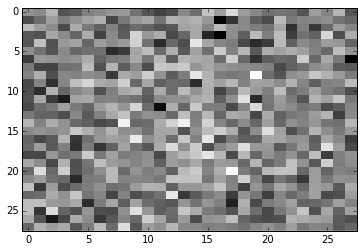

step 22000, train accuracy 0.52
step 22100, train accuracy 0.44
step 22200, train accuracy 0.44
step 22300, train accuracy 0.44
step 22400, train accuracy 0.44
step 22500, train accuracy 0.44
step 22600, train accuracy 0.4
step 22700, train accuracy 0.46
step 22800, train accuracy 0.32
step 22900, train accuracy 0.44
Reconstruction of a 7


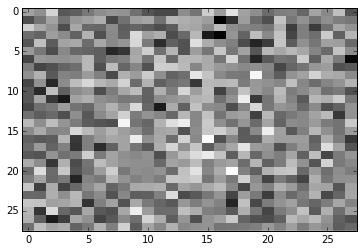

step 23000, train accuracy 0.3
step 23100, train accuracy 0.42
step 23200, train accuracy 0.38
step 23300, train accuracy 0.54
step 23400, train accuracy 0.54
step 23500, train accuracy 0.5
step 23600, train accuracy 0.42
step 23700, train accuracy 0.54
step 23800, train accuracy 0.36
step 23900, train accuracy 0.4
Reconstruction of a 0


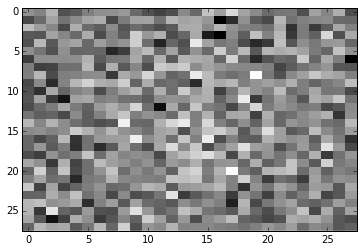

step 24000, train accuracy 0.3
step 24100, train accuracy 0.5
step 24200, train accuracy 0.46
step 24300, train accuracy 0.46
step 24400, train accuracy 0.34
step 24500, train accuracy 0.4
step 24600, train accuracy 0.46
step 24700, train accuracy 0.48
step 24800, train accuracy 0.54
step 24900, train accuracy 0.36
Reconstruction of a 4


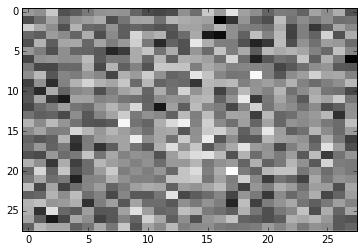

step 25000, train accuracy 0.5
step 25100, train accuracy 0.48
step 25200, train accuracy 0.42
step 25300, train accuracy 0.5
step 25400, train accuracy 0.42
step 25500, train accuracy 0.4
step 25600, train accuracy 0.44
step 25700, train accuracy 0.32
step 25800, train accuracy 0.48
step 25900, train accuracy 0.52
Reconstruction of a 3


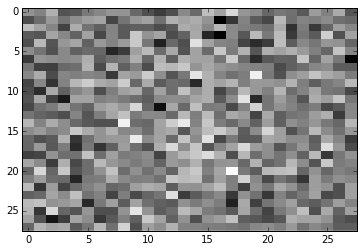

step 26000, train accuracy 0.48
step 26100, train accuracy 0.46
step 26200, train accuracy 0.44
step 26300, train accuracy 0.4
step 26400, train accuracy 0.5
step 26500, train accuracy 0.46
step 26600, train accuracy 0.46
step 26700, train accuracy 0.44
step 26800, train accuracy 0.46
step 26900, train accuracy 0.48
Reconstruction of a 8


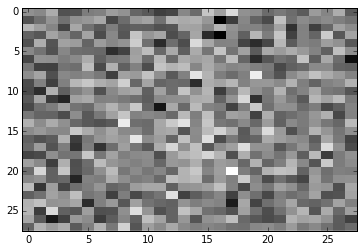

step 27000, train accuracy 0.26
step 27100, train accuracy 0.42
step 27200, train accuracy 0.54
step 27300, train accuracy 0.46
step 27400, train accuracy 0.42
step 27500, train accuracy 0.42
step 27600, train accuracy 0.58
step 27700, train accuracy 0.5
step 27800, train accuracy 0.38
step 27900, train accuracy 0.42
Reconstruction of a 1


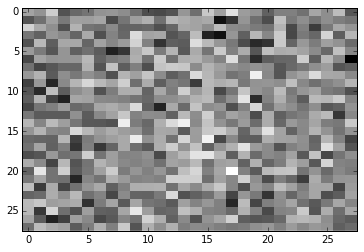

step 28000, train accuracy 0.4
step 28100, train accuracy 0.4
step 28200, train accuracy 0.38
step 28300, train accuracy 0.34
step 28400, train accuracy 0.4
step 28500, train accuracy 0.46
step 28600, train accuracy 0.54
step 28700, train accuracy 0.44
step 28800, train accuracy 0.4
step 28900, train accuracy 0.4
Reconstruction of a 3


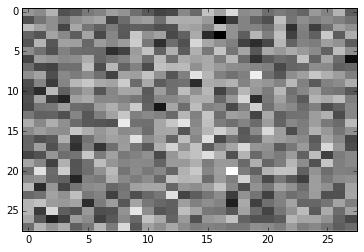

step 29000, train accuracy 0.54
step 29100, train accuracy 0.36
step 29200, train accuracy 0.52
step 29300, train accuracy 0.38
step 29400, train accuracy 0.36
step 29500, train accuracy 0.48
step 29600, train accuracy 0.5
step 29700, train accuracy 0.44
step 29800, train accuracy 0.44
step 29900, train accuracy 0.58
epoch 3, learning rate 1e-05
Reconstruction of a 8


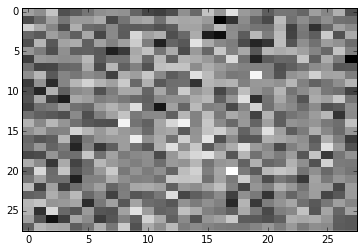

step 30000, train accuracy 0.42
step 30100, train accuracy 0.5
step 30200, train accuracy 0.44
step 30300, train accuracy 0.46
step 30400, train accuracy 0.52
step 30500, train accuracy 0.4
step 30600, train accuracy 0.4
step 30700, train accuracy 0.38
step 30800, train accuracy 0.54
step 30900, train accuracy 0.54
Reconstruction of a 7


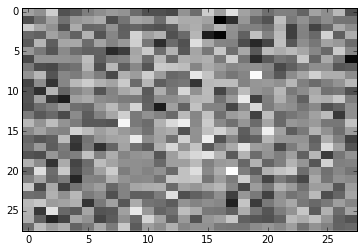

step 31000, train accuracy 0.38
step 31100, train accuracy 0.54
step 31200, train accuracy 0.36
step 31300, train accuracy 0.46
step 31400, train accuracy 0.48
step 31500, train accuracy 0.28
step 31600, train accuracy 0.46
step 31700, train accuracy 0.32
step 31800, train accuracy 0.5
step 31900, train accuracy 0.52
Reconstruction of a 6


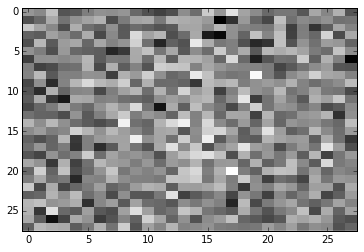

step 32000, train accuracy 0.42
step 32100, train accuracy 0.54
step 32200, train accuracy 0.38
step 32300, train accuracy 0.46
step 32400, train accuracy 0.32
step 32500, train accuracy 0.44
step 32600, train accuracy 0.64
step 32700, train accuracy 0.54
step 32800, train accuracy 0.54
step 32900, train accuracy 0.5
Reconstruction of a 6


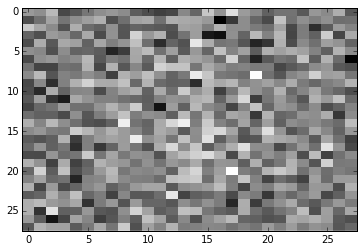

step 33000, train accuracy 0.52
step 33100, train accuracy 0.46
step 33200, train accuracy 0.46
step 33300, train accuracy 0.4
step 33400, train accuracy 0.44
step 33500, train accuracy 0.5
step 33600, train accuracy 0.42
step 33700, train accuracy 0.48
step 33800, train accuracy 0.52
step 33900, train accuracy 0.4
Reconstruction of a 5


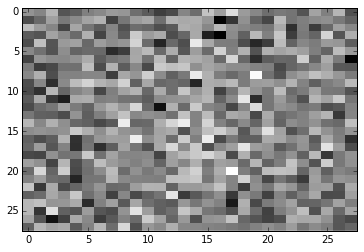

step 34000, train accuracy 0.4
step 34100, train accuracy 0.5
step 34200, train accuracy 0.58
step 34300, train accuracy 0.42
step 34400, train accuracy 0.52
step 34500, train accuracy 0.42
step 34600, train accuracy 0.52
step 34700, train accuracy 0.52
step 34800, train accuracy 0.52
step 34900, train accuracy 0.56
Reconstruction of a 5


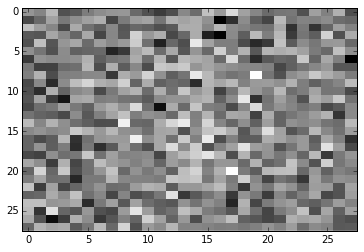

step 35000, train accuracy 0.44
step 35100, train accuracy 0.56
step 35200, train accuracy 0.52
step 35300, train accuracy 0.5
step 35400, train accuracy 0.52
step 35500, train accuracy 0.58
step 35600, train accuracy 0.42
step 35700, train accuracy 0.56
step 35800, train accuracy 0.48
step 35900, train accuracy 0.5
Reconstruction of a 1


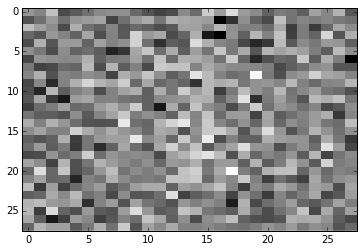

step 36000, train accuracy 0.46
step 36100, train accuracy 0.42
step 36200, train accuracy 0.6
step 36300, train accuracy 0.58
step 36400, train accuracy 0.62
step 36500, train accuracy 0.56
step 36600, train accuracy 0.3
step 36700, train accuracy 0.34
step 36800, train accuracy 0.46
step 36900, train accuracy 0.52
Reconstruction of a 4


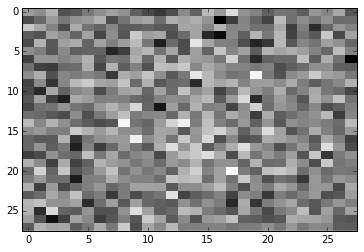

step 37000, train accuracy 0.3
step 37100, train accuracy 0.54
step 37200, train accuracy 0.52
step 37300, train accuracy 0.58
step 37400, train accuracy 0.44
step 37500, train accuracy 0.44
step 37600, train accuracy 0.48
step 37700, train accuracy 0.54
step 37800, train accuracy 0.5
step 37900, train accuracy 0.48
Reconstruction of a 7


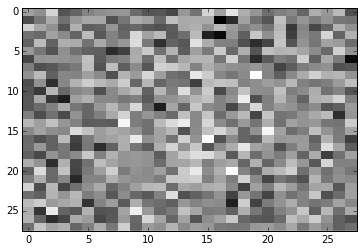

step 38000, train accuracy 0.54
step 38100, train accuracy 0.46
step 38200, train accuracy 0.5
step 38300, train accuracy 0.52
step 38400, train accuracy 0.52
step 38500, train accuracy 0.42
step 38600, train accuracy 0.44
step 38700, train accuracy 0.48
step 38800, train accuracy 0.6
step 38900, train accuracy 0.52
Reconstruction of a 3


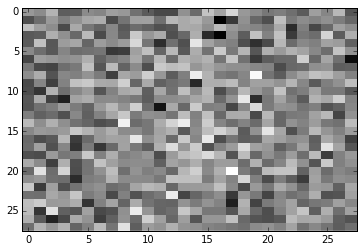

step 39000, train accuracy 0.6
step 39100, train accuracy 0.44
step 39200, train accuracy 0.42
step 39300, train accuracy 0.56
step 39400, train accuracy 0.58
step 39500, train accuracy 0.46
step 39600, train accuracy 0.5
step 39700, train accuracy 0.6
step 39800, train accuracy 0.54
step 39900, train accuracy 0.42
epoch 4, learning rate 4.64159e-06
Reconstruction of a 1


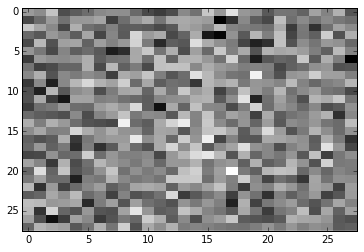

step 40000, train accuracy 0.48
step 40100, train accuracy 0.54
step 40200, train accuracy 0.48
step 40300, train accuracy 0.44
step 40400, train accuracy 0.54
step 40500, train accuracy 0.42
step 40600, train accuracy 0.52
step 40700, train accuracy 0.38
step 40800, train accuracy 0.52
step 40900, train accuracy 0.5
Reconstruction of a 8


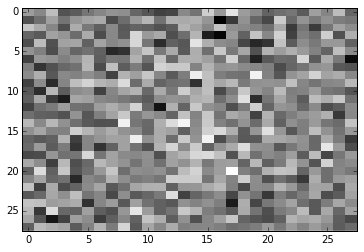

step 41000, train accuracy 0.4
step 41100, train accuracy 0.48
step 41200, train accuracy 0.42
step 41300, train accuracy 0.5
step 41400, train accuracy 0.48
step 41500, train accuracy 0.34
step 41600, train accuracy 0.5
step 41700, train accuracy 0.5
step 41800, train accuracy 0.46
step 41900, train accuracy 0.4
Reconstruction of a 4


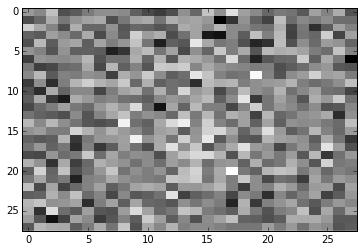

step 42000, train accuracy 0.4
step 42100, train accuracy 0.54
step 42200, train accuracy 0.48
step 42300, train accuracy 0.4
step 42400, train accuracy 0.5
step 42500, train accuracy 0.54
step 42600, train accuracy 0.56
step 42700, train accuracy 0.58
step 42800, train accuracy 0.4
step 42900, train accuracy 0.46
Reconstruction of a 5


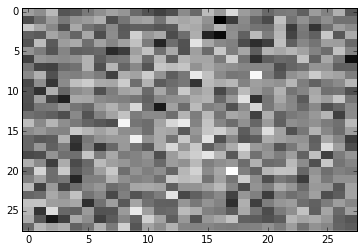

step 43000, train accuracy 0.48
step 43100, train accuracy 0.44
step 43200, train accuracy 0.36
step 43300, train accuracy 0.48
step 43400, train accuracy 0.42
step 43500, train accuracy 0.5
step 43600, train accuracy 0.44
step 43700, train accuracy 0.4
step 43800, train accuracy 0.52
step 43900, train accuracy 0.44
Reconstruction of a 8


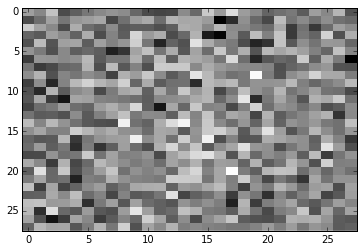

step 44000, train accuracy 0.48
step 44100, train accuracy 0.52
step 44200, train accuracy 0.48
step 44300, train accuracy 0.42
step 44400, train accuracy 0.46
step 44500, train accuracy 0.46
step 44600, train accuracy 0.4
step 44700, train accuracy 0.48
step 44800, train accuracy 0.5
step 44900, train accuracy 0.48
Reconstruction of a 1


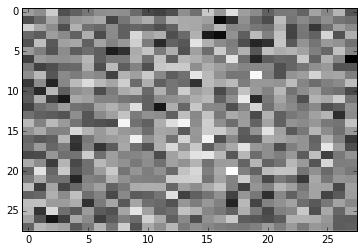

step 45000, train accuracy 0.4
step 45100, train accuracy 0.54
step 45200, train accuracy 0.58
step 45300, train accuracy 0.46
step 45400, train accuracy 0.44
step 45500, train accuracy 0.62
step 45600, train accuracy 0.48
step 45700, train accuracy 0.6
step 45800, train accuracy 0.44
step 45900, train accuracy 0.5
Reconstruction of a 5


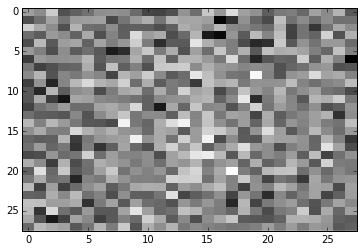

step 46000, train accuracy 0.4
step 46100, train accuracy 0.42
step 46200, train accuracy 0.46
step 46300, train accuracy 0.44
step 46400, train accuracy 0.48
step 46500, train accuracy 0.5
step 46600, train accuracy 0.54
step 46700, train accuracy 0.5
step 46800, train accuracy 0.5
step 46900, train accuracy 0.52
Reconstruction of a 6


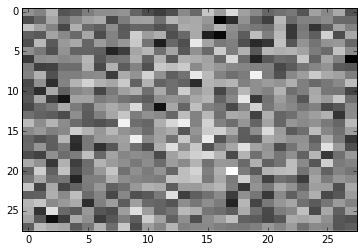

step 47000, train accuracy 0.5
step 47100, train accuracy 0.48
step 47200, train accuracy 0.6
step 47300, train accuracy 0.5
step 47400, train accuracy 0.48
step 47500, train accuracy 0.42
step 47600, train accuracy 0.54
step 47700, train accuracy 0.52
step 47800, train accuracy 0.48
step 47900, train accuracy 0.42
Reconstruction of a 5


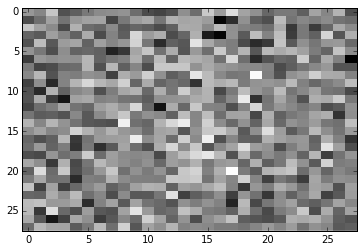

step 48000, train accuracy 0.44
step 48100, train accuracy 0.58
step 48200, train accuracy 0.4
step 48300, train accuracy 0.44
step 48400, train accuracy 0.44
step 48500, train accuracy 0.52
step 48600, train accuracy 0.6
step 48700, train accuracy 0.58
step 48800, train accuracy 0.48
step 48900, train accuracy 0.48
Reconstruction of a 1


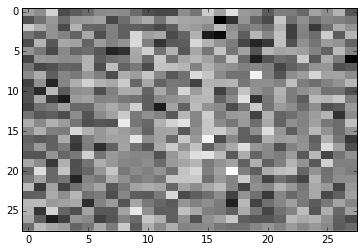

step 49000, train accuracy 0.42
step 49100, train accuracy 0.48
step 49200, train accuracy 0.46
step 49300, train accuracy 0.58
step 49400, train accuracy 0.46
step 49500, train accuracy 0.58
step 49600, train accuracy 0.52
step 49700, train accuracy 0.46
step 49800, train accuracy 0.48
step 49900, train accuracy 0.5
epoch 5, learning rate 2.15443e-06
Reconstruction of a 6


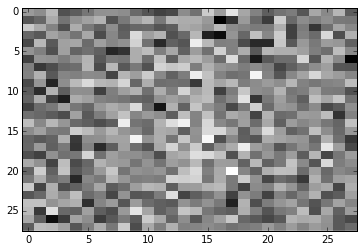

step 50000, train accuracy 0.44
step 50100, train accuracy 0.56
step 50200, train accuracy 0.48
step 50300, train accuracy 0.58
step 50400, train accuracy 0.48
step 50500, train accuracy 0.48
step 50600, train accuracy 0.52
step 50700, train accuracy 0.36
step 50800, train accuracy 0.32
step 50900, train accuracy 0.52
Reconstruction of a 7


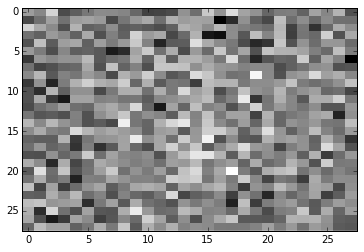

step 51000, train accuracy 0.62
step 51100, train accuracy 0.4
step 51200, train accuracy 0.56
step 51300, train accuracy 0.4
step 51400, train accuracy 0.52
step 51500, train accuracy 0.52
step 51600, train accuracy 0.4
step 51700, train accuracy 0.62
step 51800, train accuracy 0.52
step 51900, train accuracy 0.54
Reconstruction of a 4


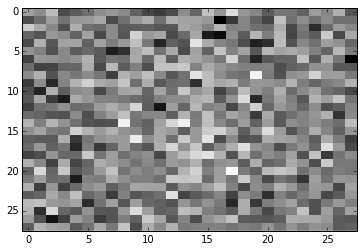

step 52000, train accuracy 0.56
step 52100, train accuracy 0.58
step 52200, train accuracy 0.52
step 52300, train accuracy 0.5
step 52400, train accuracy 0.5
step 52500, train accuracy 0.54
step 52600, train accuracy 0.54
step 52700, train accuracy 0.5
step 52800, train accuracy 0.6
step 52900, train accuracy 0.46
Reconstruction of a 6


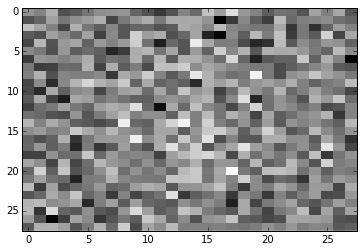

step 53000, train accuracy 0.48
step 53100, train accuracy 0.38
step 53200, train accuracy 0.54
step 53300, train accuracy 0.62
step 53400, train accuracy 0.44
step 53500, train accuracy 0.56
step 53600, train accuracy 0.46
step 53700, train accuracy 0.56
step 53800, train accuracy 0.62
step 53900, train accuracy 0.48
Reconstruction of a 9


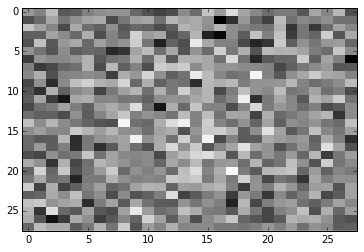

step 54000, train accuracy 0.56
step 54100, train accuracy 0.5
step 54200, train accuracy 0.5
step 54300, train accuracy 0.42
step 54400, train accuracy 0.56
step 54500, train accuracy 0.5
step 54600, train accuracy 0.5
step 54700, train accuracy 0.48
step 54800, train accuracy 0.44
step 54900, train accuracy 0.5
Reconstruction of a 3


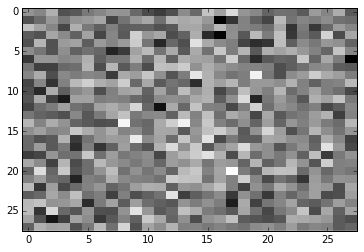

step 55000, train accuracy 0.56
step 55100, train accuracy 0.54
step 55200, train accuracy 0.42
step 55300, train accuracy 0.5
step 55400, train accuracy 0.64
step 55500, train accuracy 0.46
step 55600, train accuracy 0.54
step 55700, train accuracy 0.54
step 55800, train accuracy 0.44
step 55900, train accuracy 0.42
Reconstruction of a 7


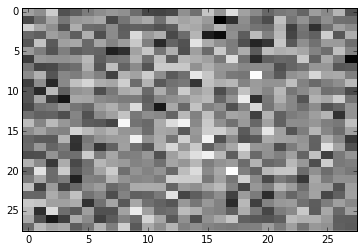

step 56000, train accuracy 0.52
step 56100, train accuracy 0.52
step 56200, train accuracy 0.5
step 56300, train accuracy 0.5
step 56400, train accuracy 0.5
step 56500, train accuracy 0.36
step 56600, train accuracy 0.42
step 56700, train accuracy 0.38
step 56800, train accuracy 0.46
step 56900, train accuracy 0.52
Reconstruction of a 4


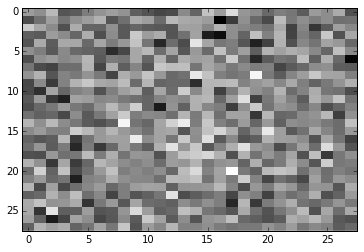

step 57000, train accuracy 0.34
step 57100, train accuracy 0.4
step 57200, train accuracy 0.48
step 57300, train accuracy 0.52
step 57400, train accuracy 0.58
step 57500, train accuracy 0.52
step 57600, train accuracy 0.48
step 57700, train accuracy 0.44
step 57800, train accuracy 0.52
step 57900, train accuracy 0.4
Reconstruction of a 1


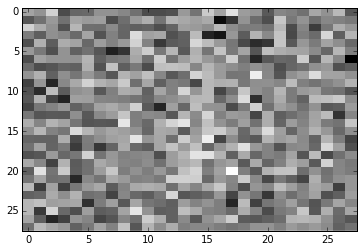

step 58000, train accuracy 0.46
step 58100, train accuracy 0.56
step 58200, train accuracy 0.48
step 58300, train accuracy 0.52
step 58400, train accuracy 0.48
step 58500, train accuracy 0.58
step 58600, train accuracy 0.5
step 58700, train accuracy 0.44
step 58800, train accuracy 0.46
step 58900, train accuracy 0.46
Reconstruction of a 3


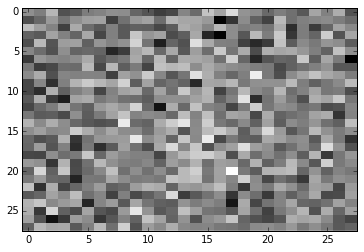

step 59000, train accuracy 0.48
step 59100, train accuracy 0.46
step 59200, train accuracy 0.5
step 59300, train accuracy 0.6
step 59400, train accuracy 0.42
step 59500, train accuracy 0.5
step 59600, train accuracy 0.56
step 59700, train accuracy 0.5
step 59800, train accuracy 0.5
step 59900, train accuracy 0.62
epoch 6, learning rate 1e-06
Reconstruction of a 4


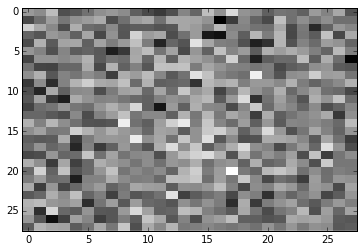

step 60000, train accuracy 0.4
step 60100, train accuracy 0.5
step 60200, train accuracy 0.4
step 60300, train accuracy 0.36
step 60400, train accuracy 0.5
step 60500, train accuracy 0.5
step 60600, train accuracy 0.6
step 60700, train accuracy 0.44
step 60800, train accuracy 0.62
step 60900, train accuracy 0.44
Reconstruction of a 5


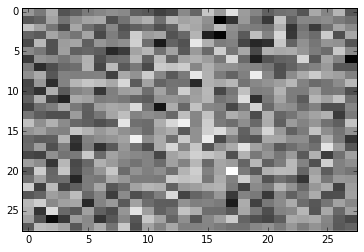

step 61000, train accuracy 0.32
step 61100, train accuracy 0.52
step 61200, train accuracy 0.52
step 61300, train accuracy 0.52
step 61400, train accuracy 0.44
step 61500, train accuracy 0.4
step 61600, train accuracy 0.6
step 61700, train accuracy 0.5
step 61800, train accuracy 0.52
step 61900, train accuracy 0.48
Reconstruction of a 1


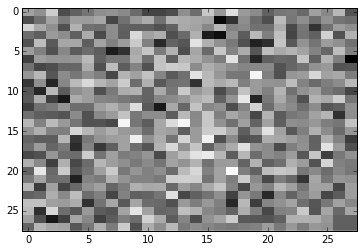

step 62000, train accuracy 0.42
step 62100, train accuracy 0.52
step 62200, train accuracy 0.58
step 62300, train accuracy 0.6
step 62400, train accuracy 0.64
step 62500, train accuracy 0.54
step 62600, train accuracy 0.56
step 62700, train accuracy 0.42
step 62800, train accuracy 0.48
step 62900, train accuracy 0.52
Reconstruction of a 5


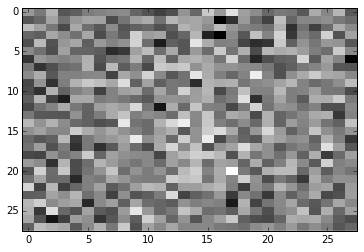

step 63000, train accuracy 0.42
step 63100, train accuracy 0.44
step 63200, train accuracy 0.44
step 63300, train accuracy 0.44
step 63400, train accuracy 0.4
step 63500, train accuracy 0.38
step 63600, train accuracy 0.44
step 63700, train accuracy 0.5
step 63800, train accuracy 0.46
step 63900, train accuracy 0.52
Reconstruction of a 1


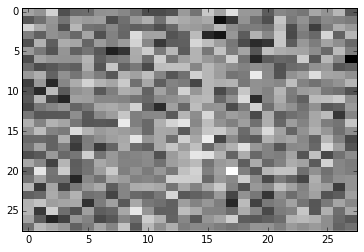

step 64000, train accuracy 0.62
step 64100, train accuracy 0.6
step 64200, train accuracy 0.56
step 64300, train accuracy 0.46
step 64400, train accuracy 0.58
step 64500, train accuracy 0.44
step 64600, train accuracy 0.52
step 64700, train accuracy 0.48
step 64800, train accuracy 0.58
step 64900, train accuracy 0.5
Reconstruction of a 9


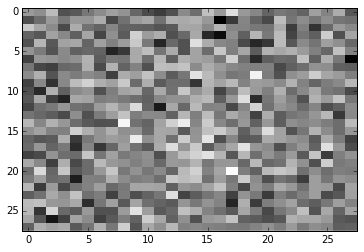

step 65000, train accuracy 0.48
step 65100, train accuracy 0.42
step 65200, train accuracy 0.46
step 65300, train accuracy 0.44
step 65400, train accuracy 0.52
step 65500, train accuracy 0.6
step 65600, train accuracy 0.46
step 65700, train accuracy 0.64
step 65800, train accuracy 0.5
step 65900, train accuracy 0.52
Reconstruction of a 8


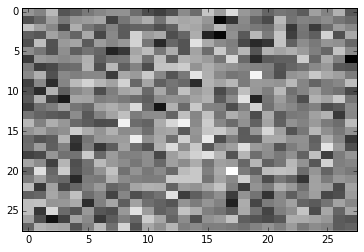

step 66000, train accuracy 0.44
step 66100, train accuracy 0.6
step 66200, train accuracy 0.44
step 66300, train accuracy 0.42
step 66400, train accuracy 0.48
step 66500, train accuracy 0.56
step 66600, train accuracy 0.52
step 66700, train accuracy 0.56
step 66800, train accuracy 0.56
step 66900, train accuracy 0.44
Reconstruction of a 4


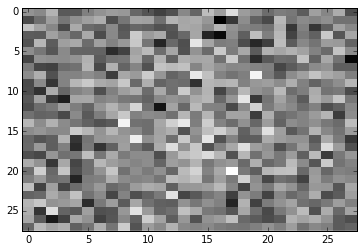

step 67000, train accuracy 0.48
step 67100, train accuracy 0.54
step 67200, train accuracy 0.5
step 67300, train accuracy 0.58
step 67400, train accuracy 0.36
step 67500, train accuracy 0.52
step 67600, train accuracy 0.52
step 67700, train accuracy 0.56
step 67800, train accuracy 0.54
step 67900, train accuracy 0.58
Reconstruction of a 6


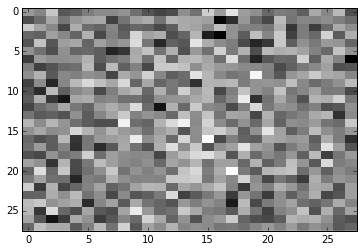

step 68000, train accuracy 0.38
step 68100, train accuracy 0.58
step 68200, train accuracy 0.48
step 68300, train accuracy 0.46
step 68400, train accuracy 0.62
step 68500, train accuracy 0.48
step 68600, train accuracy 0.5
step 68700, train accuracy 0.52
step 68800, train accuracy 0.38
step 68900, train accuracy 0.5
Reconstruction of a 2


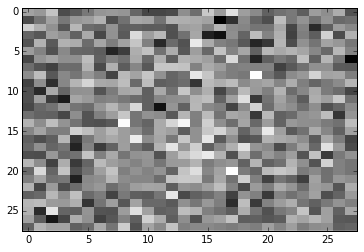

step 69000, train accuracy 0.5
step 69100, train accuracy 0.38
step 69200, train accuracy 0.54
step 69300, train accuracy 0.5
step 69400, train accuracy 0.5
step 69500, train accuracy 0.54
step 69600, train accuracy 0.46
step 69700, train accuracy 0.4
step 69800, train accuracy 0.58
step 69900, train accuracy 0.52
epoch 7, learning rate 4.64159e-07
Reconstruction of a 6


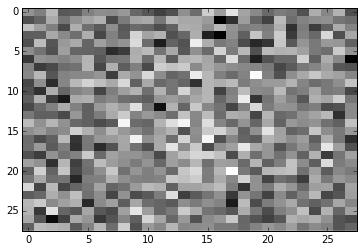

step 70000, train accuracy 0.56
step 70100, train accuracy 0.48
step 70200, train accuracy 0.52
step 70300, train accuracy 0.52
step 70400, train accuracy 0.42
step 70500, train accuracy 0.46
step 70600, train accuracy 0.56
step 70700, train accuracy 0.4
step 70800, train accuracy 0.6
step 70900, train accuracy 0.52
Reconstruction of a 9


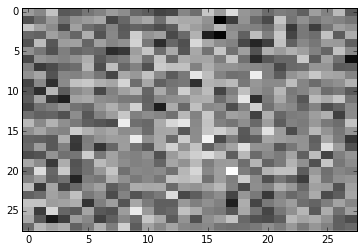

step 71000, train accuracy 0.42
step 71100, train accuracy 0.42
step 71200, train accuracy 0.52
step 71300, train accuracy 0.46
step 71400, train accuracy 0.58
step 71500, train accuracy 0.5
step 71600, train accuracy 0.46
step 71700, train accuracy 0.54
step 71800, train accuracy 0.44
step 71900, train accuracy 0.52
Reconstruction of a 8


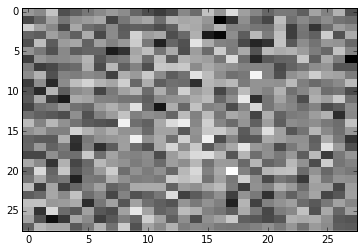

step 72000, train accuracy 0.4
step 72100, train accuracy 0.48
step 72200, train accuracy 0.38
step 72300, train accuracy 0.42
step 72400, train accuracy 0.52
step 72500, train accuracy 0.52
step 72600, train accuracy 0.52
step 72700, train accuracy 0.38
step 72800, train accuracy 0.48
step 72900, train accuracy 0.58
Reconstruction of a 2


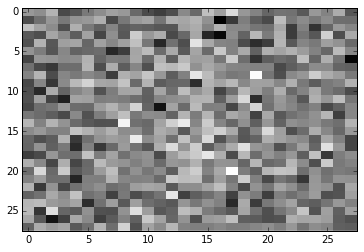

step 73000, train accuracy 0.4
step 73100, train accuracy 0.58
step 73200, train accuracy 0.5
step 73300, train accuracy 0.62
step 73400, train accuracy 0.46
step 73500, train accuracy 0.5
step 73600, train accuracy 0.52
step 73700, train accuracy 0.44
step 73800, train accuracy 0.54
step 73900, train accuracy 0.56
Reconstruction of a 7


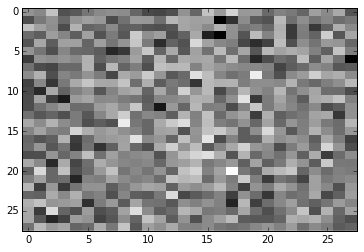

step 74000, train accuracy 0.5
step 74100, train accuracy 0.52
step 74200, train accuracy 0.52
step 74300, train accuracy 0.4
step 74400, train accuracy 0.62
step 74500, train accuracy 0.58
step 74600, train accuracy 0.58
step 74700, train accuracy 0.36
step 74800, train accuracy 0.44
step 74900, train accuracy 0.52
Reconstruction of a 3


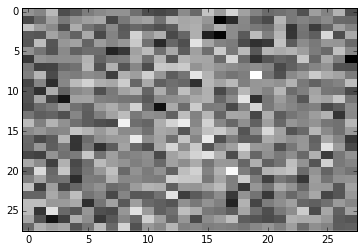

step 75000, train accuracy 0.42
step 75100, train accuracy 0.56
step 75200, train accuracy 0.42
step 75300, train accuracy 0.52
step 75400, train accuracy 0.5
step 75500, train accuracy 0.38
step 75600, train accuracy 0.56
step 75700, train accuracy 0.54
step 75800, train accuracy 0.58
step 75900, train accuracy 0.42
Reconstruction of a 2


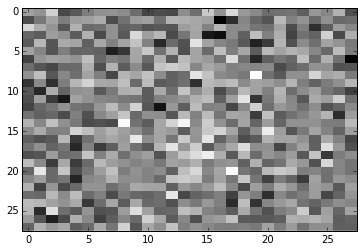

step 76000, train accuracy 0.52
step 76100, train accuracy 0.5
step 76200, train accuracy 0.58
step 76300, train accuracy 0.44
step 76400, train accuracy 0.5
step 76500, train accuracy 0.48
step 76600, train accuracy 0.38
step 76700, train accuracy 0.54
step 76800, train accuracy 0.4
step 76900, train accuracy 0.58
Reconstruction of a 8


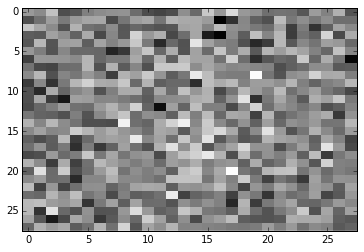

step 77000, train accuracy 0.58
step 77100, train accuracy 0.58
step 77200, train accuracy 0.48
step 77300, train accuracy 0.5
step 77400, train accuracy 0.48
step 77500, train accuracy 0.48
step 77600, train accuracy 0.56
step 77700, train accuracy 0.42
step 77800, train accuracy 0.42
step 77900, train accuracy 0.54
Reconstruction of a 3


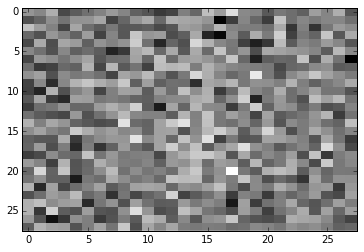

step 78000, train accuracy 0.5
step 78100, train accuracy 0.58
step 78200, train accuracy 0.5
step 78300, train accuracy 0.48
step 78400, train accuracy 0.5
step 78500, train accuracy 0.44
step 78600, train accuracy 0.5
step 78700, train accuracy 0.6
step 78800, train accuracy 0.56
step 78900, train accuracy 0.42
Reconstruction of a 8


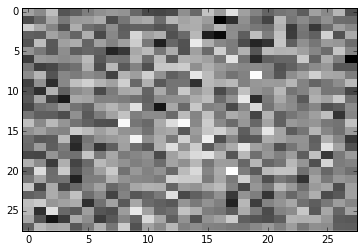

step 79000, train accuracy 0.54
step 79100, train accuracy 0.42
step 79200, train accuracy 0.58
step 79300, train accuracy 0.48
step 79400, train accuracy 0.6
step 79500, train accuracy 0.48
step 79600, train accuracy 0.48
step 79700, train accuracy 0.54
step 79800, train accuracy 0.36
step 79900, train accuracy 0.6
epoch 8, learning rate 2.15443e-07
Reconstruction of a 0


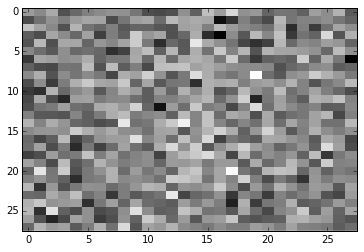

step 80000, train accuracy 0.4
step 80100, train accuracy 0.44
step 80200, train accuracy 0.48
step 80300, train accuracy 0.46
step 80400, train accuracy 0.46
step 80500, train accuracy 0.46
step 80600, train accuracy 0.58
step 80700, train accuracy 0.38
step 80800, train accuracy 0.36
step 80900, train accuracy 0.48
Reconstruction of a 4


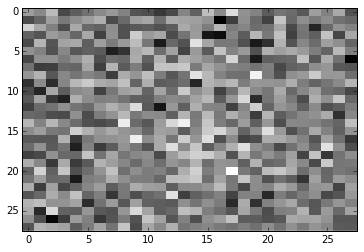

step 81000, train accuracy 0.46
step 81100, train accuracy 0.5
step 81200, train accuracy 0.46
step 81300, train accuracy 0.5
step 81400, train accuracy 0.48
step 81500, train accuracy 0.6
step 81600, train accuracy 0.6
step 81700, train accuracy 0.46
step 81800, train accuracy 0.54
step 81900, train accuracy 0.62
Reconstruction of a 0


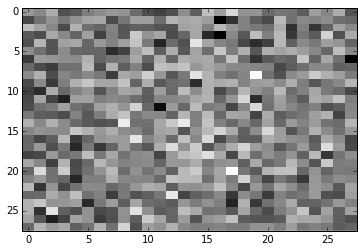

step 82000, train accuracy 0.6
step 82100, train accuracy 0.5
step 82200, train accuracy 0.46
step 82300, train accuracy 0.52
step 82400, train accuracy 0.56
step 82500, train accuracy 0.42
step 82600, train accuracy 0.54
step 82700, train accuracy 0.52
step 82800, train accuracy 0.5
step 82900, train accuracy 0.56
Reconstruction of a 6


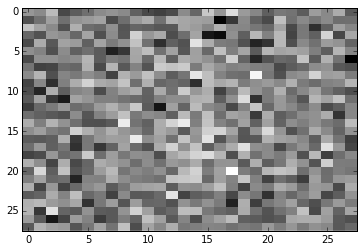

step 83000, train accuracy 0.52
step 83100, train accuracy 0.54
step 83200, train accuracy 0.48
step 83300, train accuracy 0.44
step 83400, train accuracy 0.48
step 83500, train accuracy 0.48
step 83600, train accuracy 0.54
step 83700, train accuracy 0.64
step 83800, train accuracy 0.34
step 83900, train accuracy 0.4
Reconstruction of a 8


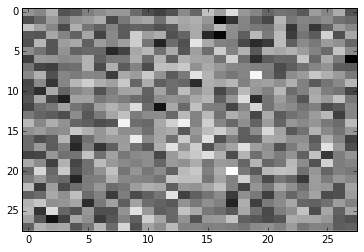

step 84000, train accuracy 0.44
step 84100, train accuracy 0.4
step 84200, train accuracy 0.52
step 84300, train accuracy 0.42
step 84400, train accuracy 0.48
step 84500, train accuracy 0.46
step 84600, train accuracy 0.54
step 84700, train accuracy 0.6
step 84800, train accuracy 0.46
step 84900, train accuracy 0.54
Reconstruction of a 6


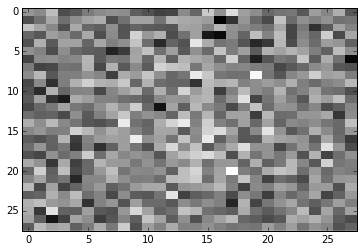

step 85000, train accuracy 0.56
step 85100, train accuracy 0.56
step 85200, train accuracy 0.48
step 85300, train accuracy 0.54
step 85400, train accuracy 0.5
step 85500, train accuracy 0.52
step 85600, train accuracy 0.5
step 85700, train accuracy 0.5
step 85800, train accuracy 0.48
step 85900, train accuracy 0.52
Reconstruction of a 5


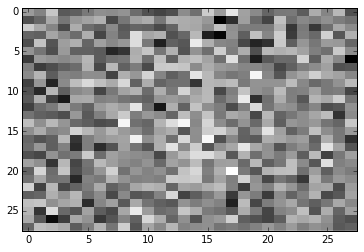

step 86000, train accuracy 0.38
step 86100, train accuracy 0.54
step 86200, train accuracy 0.64
step 86300, train accuracy 0.46
step 86400, train accuracy 0.48
step 86500, train accuracy 0.48
step 86600, train accuracy 0.52
step 86700, train accuracy 0.44
step 86800, train accuracy 0.58
step 86900, train accuracy 0.56
Reconstruction of a 1


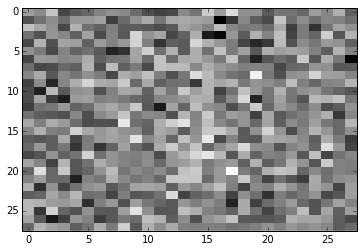

step 87000, train accuracy 0.48
step 87100, train accuracy 0.48
step 87200, train accuracy 0.46
step 87300, train accuracy 0.5
step 87400, train accuracy 0.54
step 87500, train accuracy 0.5
step 87600, train accuracy 0.52
step 87700, train accuracy 0.52
step 87800, train accuracy 0.42
step 87900, train accuracy 0.48
Reconstruction of a 7


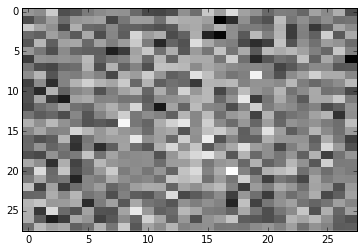

step 88000, train accuracy 0.6
step 88100, train accuracy 0.58
step 88200, train accuracy 0.64
step 88300, train accuracy 0.36
step 88400, train accuracy 0.46
step 88500, train accuracy 0.58
step 88600, train accuracy 0.52
step 88700, train accuracy 0.58
step 88800, train accuracy 0.5
step 88900, train accuracy 0.48
Reconstruction of a 1


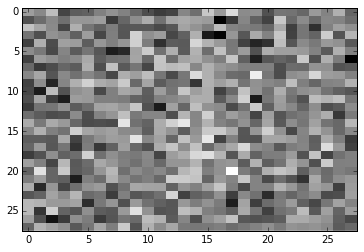

step 89000, train accuracy 0.42
step 89100, train accuracy 0.46
step 89200, train accuracy 0.56
step 89300, train accuracy 0.56
step 89400, train accuracy 0.52
step 89500, train accuracy 0.46
step 89600, train accuracy 0.54
step 89700, train accuracy 0.42
step 89800, train accuracy 0.4
step 89900, train accuracy 0.48
epoch 9, learning rate 1e-07
Reconstruction of a 7


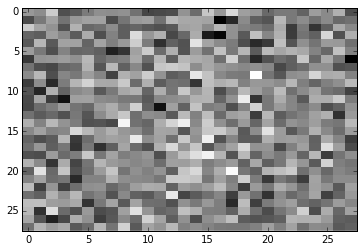

step 90000, train accuracy 0.5
step 90100, train accuracy 0.38
step 90200, train accuracy 0.58
step 90300, train accuracy 0.6
step 90400, train accuracy 0.48
step 90500, train accuracy 0.48
step 90600, train accuracy 0.52
step 90700, train accuracy 0.56
step 90800, train accuracy 0.44
step 90900, train accuracy 0.38
Reconstruction of a 1


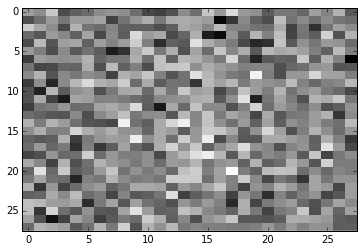

step 91000, train accuracy 0.52
step 91100, train accuracy 0.48
step 91200, train accuracy 0.46
step 91300, train accuracy 0.46
step 91400, train accuracy 0.52
step 91500, train accuracy 0.44
step 91600, train accuracy 0.62
step 91700, train accuracy 0.5
step 91800, train accuracy 0.48
step 91900, train accuracy 0.5
Reconstruction of a 5


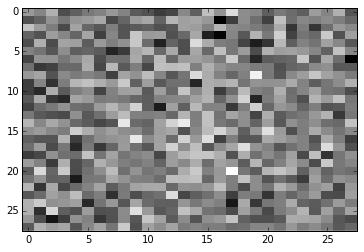

step 92000, train accuracy 0.44
step 92100, train accuracy 0.42
step 92200, train accuracy 0.58
step 92300, train accuracy 0.58
step 92400, train accuracy 0.5
step 92500, train accuracy 0.56
step 92600, train accuracy 0.48
step 92700, train accuracy 0.56
step 92800, train accuracy 0.42
step 92900, train accuracy 0.42
Reconstruction of a 6


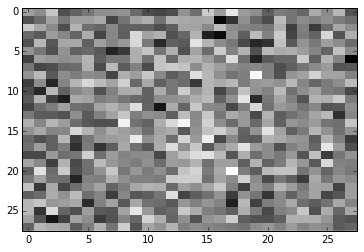

step 93000, train accuracy 0.52
step 93100, train accuracy 0.56
step 93200, train accuracy 0.5
step 93300, train accuracy 0.64
step 93400, train accuracy 0.52
step 93500, train accuracy 0.58
step 93600, train accuracy 0.58
step 93700, train accuracy 0.46
step 93800, train accuracy 0.5
step 93900, train accuracy 0.44
Reconstruction of a 6


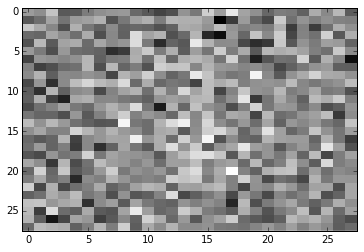

step 94000, train accuracy 0.36
step 94100, train accuracy 0.46
step 94200, train accuracy 0.54
step 94300, train accuracy 0.64
step 94400, train accuracy 0.52
step 94500, train accuracy 0.38
step 94600, train accuracy 0.54
step 94700, train accuracy 0.44
step 94800, train accuracy 0.32
step 94900, train accuracy 0.4
Reconstruction of a 6


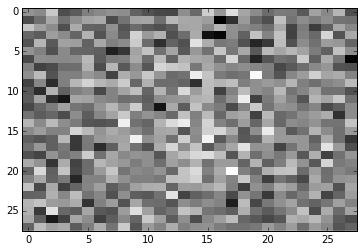

step 95000, train accuracy 0.64
step 95100, train accuracy 0.48
step 95200, train accuracy 0.42
step 95300, train accuracy 0.56
step 95400, train accuracy 0.56
step 95500, train accuracy 0.46
step 95600, train accuracy 0.5
step 95700, train accuracy 0.64
step 95800, train accuracy 0.56
step 95900, train accuracy 0.52
Reconstruction of a 1


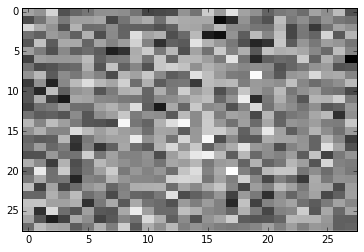

step 96000, train accuracy 0.44
step 96100, train accuracy 0.6
step 96200, train accuracy 0.58
step 96300, train accuracy 0.52
step 96400, train accuracy 0.5
step 96500, train accuracy 0.48
step 96600, train accuracy 0.4
step 96700, train accuracy 0.52
step 96800, train accuracy 0.44
step 96900, train accuracy 0.52
Reconstruction of a 2


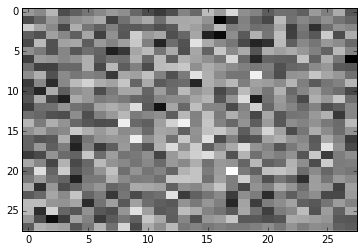

step 97000, train accuracy 0.54
step 97100, train accuracy 0.56
step 97200, train accuracy 0.32
step 97300, train accuracy 0.44
step 97400, train accuracy 0.4
step 97500, train accuracy 0.5
step 97600, train accuracy 0.58
step 97700, train accuracy 0.5
step 97800, train accuracy 0.48
step 97900, train accuracy 0.5
Reconstruction of a 8


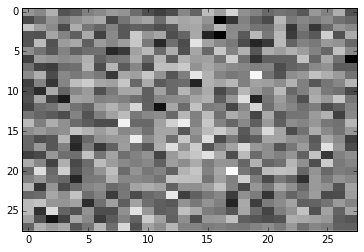

step 98000, train accuracy 0.52
step 98100, train accuracy 0.4
step 98200, train accuracy 0.44
step 98300, train accuracy 0.46
step 98400, train accuracy 0.56
step 98500, train accuracy 0.44
step 98600, train accuracy 0.5
step 98700, train accuracy 0.54
step 98800, train accuracy 0.46
step 98900, train accuracy 0.4
Reconstruction of a 6


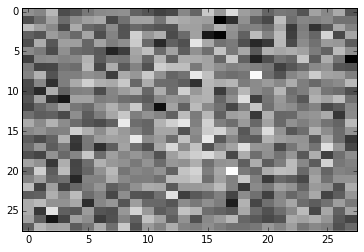

step 99000, train accuracy 0.54
step 99100, train accuracy 0.62
step 99200, train accuracy 0.5
step 99300, train accuracy 0.48
step 99400, train accuracy 0.38
step 99500, train accuracy 0.46
step 99600, train accuracy 0.48
step 99700, train accuracy 0.66
step 99800, train accuracy 0.5
step 99900, train accuracy 0.44
test accuracy 0.5041


In [6]:
with tf.Graph().as_default(): 
  with tf.name_scope('common'):
    x = tf.placeholder(tf.float32, shape=[None, 784])
    y_ = tf.placeholder(tf.float32, shape=[None, 10])
    # x_r = tf.placeholder(tf.float32, shape=[None, 784])
    learning_rate = tf.placeholder(tf.float32, shape=[])

    W = tf.Variable(tf.truncated_normal([784,100], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_2 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
    b_2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_3 = tf.Variable(tf.truncated_normal([100,100], stddev=0.1))
    b_3 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
    W_4 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
    b_4 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

    a = tf.nn.relu(tf.matmul(x, W) + b)
    a_2 = tf.nn.relu(tf.matmul(a, W_2) + b_2)
    a_3 = tf.nn.relu(tf.matmul(a_2, W_3) + b_3)
    y = tf.nn.sigmoid(tf.matmul(a_3, W_4) + b_4)

  with tf.name_scope('backwards'):
    a_2_r = tf.nn.relu(tf.matmul(a_3 - b_3, tf.transpose(W_3)))
    a_r = tf.nn.relu(tf.matmul(a_2_r - b_2, tf.transpose(W_2)))
    x_r = tf.matmul(a_r - b, tf.transpose(W))

  global_step = tf.Variable(0, name='global_step', trainable=False)

  # losses
  cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1-y), 
                                              reduction_indices=[1]),
                              name='xentropy_mean')
  tf.scalar_summary(cross_entropy.op.name, cross_entropy)

  reconstruction_error = tf.reduce_mean(tf.reduce_sum((x-x_r)**2, reduction_indices=[1]),
                                      name='reconstruction_l2_mean_error')
  tf.scalar_summary(reconstruction_error.op.name, reconstruction_error)

  # training
  # train_step = tf.train.GradientDescentOptimizer(1e-6).minimize(cross_entropy)
  train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy, 
                                                            global_step=global_step)
  back_train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(reconstruction_error)

  # evaluation
  correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  ########## INIT AND SUMMARY HAVE TO APPEAR HERE AT THE END TO BE PROPERLY DEFINED
  # misc
  init = tf.initialize_all_variables()
  summary_op = tf.merge_all_summaries()

  with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.train.SummaryWriter('./mnist_relu_3hl/standard_grad', sess.graph)

    num_epochs = 10
    steps_per_epoch = 10000
    for epoch in range(num_epochs):
      l_r = 10**np.linspace(-4,-7,num_epochs)[epoch]
      print("epoch %d, learning rate %g"%(epoch,l_r))

      for step in range(steps_per_epoch):
        batch = mnist.train.next_batch(50)
        feed_dict = {x: batch[0], y_: batch[1], learning_rate: l_r}

        if step%1000 == 0:
          reconstruction = x_r.eval(feed_dict=feed_dict)
          print("Reconstruction of a %d"%(np.argmax(batch[1][0])))
          plt.imshow(np.reshape(reconstruction[0],(28,28)),
                     cmap=plt.get_cmap('gray'),
                     interpolation='none',
                     aspect="auto")
          plt.show()

        if step%100 == 0:
          train_accuracy = accuracy.eval(feed_dict=feed_dict)
          print("step %d, train accuracy %g"%(step + epoch*steps_per_epoch, train_accuracy))
          summary_str = sess.run(summary_op, feed_dict=feed_dict)
          summary_writer.add_summary(summary_str, step + epoch*steps_per_epoch)
          summary_writer.flush()

        train_step.run(feed_dict=feed_dict)
#         back_train_step.run(feed_dict=feed_dict)

    print("test accuracy %g"%accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels}))